# Initializing and Loading Data

In [3]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import math

# notebook options
pd.set_option('display.max_columns', None)

In [6]:
# read county-population-consumption-production-scaled.geojson
food = gpd.read_file('./output-data/county-population-consumption-production-scaled-with-impacts.geojson')


In [3]:
food

geoid       geography        geographic_area_name  total_population  \
0      1001  0500000US01001     Autauga County, Alabama             58239   
1      1003  0500000US01003     Baldwin County, Alabama            227131   
2      1005  0500000US01005     Barbour County, Alabama             25259   
3      1007  0500000US01007        Bibb County, Alabama             22412   
4      1009  0500000US01009      Blount County, Alabama             58884   
...     ...             ...                         ...               ...   
3103  56037  0500000US56037  Sweetwater County, Wyoming             42459   
3104  56039  0500000US56039       Teton County, Wyoming             23319   
3105  56041  0500000US56041       Uinta County, Wyoming             20514   
3106  56043  0500000US56043    Washakie County, Wyoming              7768   
3107  56045  0500000US56045      Weston County, Wyoming              6891   

      agesex_male_total  agesex_female_total  agesex_male_kids  \
0                 28206                30033              7461   
1                110781               116350             27590   
2                 13361                11898              2977   
3                 12300                10112              2804   
4                 29530                29354              7789   
...                 ...                  ...               ...   
3103              21850                20609              6235   
3104              12280                11039              2551   
3105              10437                10077              3254   
3106               4004                 3764              1097   
3107               3684                 3207               888   

      agesex_male_adults  agesex_female_kids  agesex_female_adults  \
0                  20745                7516                 22517   
1                  83191               26383                 89967   
2                  10384                2853                  9045   
3                   9496                2359                  7753   
4                  21741                7041                 22313   
...                  ...                 ...                   ...   
3103               15615                5903                 14706   
3104                9729                2168                  8871   
3105                7183                2960                  7117   
3106                2907                 862                  2902   
3107                2796                 729                  2478   

      agesex_kid_total  agesex_adult_total  \
0                14977               43262   
1                53973              173158   
2                 5830               19429   
3                 5163               17249   
4                14830               44054   
...                ...                 ...   
3103             12138               30321   
3104              4719               18600   
3105              6214               14300   
3106              1959                5809   
3107              1617                5274   

      income_total_population_determined  income_low_income  \
0                                  57790              16266   
1                                 223772              51560   
2                                  22250              10479   
3                                  21000               8006   
4                                  58323              17464   
...                                  ...                ...   
3103                               41941               8490   
3104                               23240               4167   
3105                               20267               4806   
3106                                7593               1814   
3107                                6496               1469   

      income_high_income  income_unknown_income  \
0                  41524                    449   
1                 172212           

In [62]:
output_path = "./output-data/figures/"

In [66]:
production_cols = []
for c in food.columns:
    if 'kcal_produced' in c and 'drought' not in c and 'heat' not in c :
        production_cols.append(c)
        # print (c)

consumption_cols = []
for c in food.columns:
    if 'total_kcal_consumed' in c:
        consumption_cols.append(c)
        print (c)

total_kcal_consumed_Corn
total_kcal_consumed_Rice
total_kcal_consumed_Peanuts
total_kcal_consumed_Sweet corn
total_kcal_consumed_Wheat
total_kcal_consumed_Oats
total_kcal_consumed_Potatoes
total_kcal_consumed_Onions
total_kcal_consumed_Cucumbers
total_kcal_consumed_Green peas
total_kcal_consumed_Tomatoes
total_kcal_consumed_Apples
total_kcal_consumed_Grapes
total_kcal_consumed_Other citrus fruits
total_kcal_consumed_Carrots
total_kcal_consumed_Oranges
total_kcal_consumed_Peppers
total_kcal_consumed_Lettuce
total_kcal_consumed_Cabbage
total_kcal_consumed_Celery
total_kcal_consumed_Radishes
total_kcal_consumed_Tree nuts
total_kcal_consumed_Other grain
total_kcal_consumed_Broccoli and cauliflower
total_kcal_consumed_Stone fruits
total_kcal_consumed_Berries
total_kcal_consumed_Legumes
total_kcal_consumed_Melons
total_kcal_consumed_Bananas
total_kcal_consumed_Tropical fruits


# ECDF figures

In [29]:
def create_subplot_layout(num_plots):
    num_cols = math.ceil(math.sqrt(num_plots))
    num_rows = math.ceil(num_plots / num_cols)
    return plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5))

In [42]:
def ecdf_single(df, col_name):
    # sns.set_style("whitegrid") #darkgrid, whitegrid, dark, white, ticks
    # sns.set_palette("deep") #deep, muted, bright, pastel, dark, colorblind
    # sns.set_context("notebook") #paper, notebook, talk, poster
    sns.set_theme(context='poster', style='darkgrid', palette='muted', font='sans-serif', font_scale=1, color_codes=True, rc=None)
    fig, ax = plt.subplots(figsize=(8, 6))
    # sns.kdeplot(df[col_name], cumulative=True, ax=ax)
    sns.ecdfplot(df[col_name], ax=ax)
    # ax.set_xlabel('Kcal Produced')
    # ax.set_ylabel('Cumulative Distribution')
    # ax.set_title('Cumulative Distribution of Kcal Produced in Potatoes')
    # plt.savefig(output_path + 'cumulative-distribution-kcal-produced-potatoes.png', bbox_inches='tight')
    plt.show()

In [31]:
def ecdf_multiline(df, col_names):
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.set_palette("muted")
    for col_name in col_names:
        filtered_data = df[df[col_name] > 0]  # Filter the data
        if not filtered_data.empty:
            sns.ecdfplot(df[col_name], ax=ax, label=col_name)
    ax.set_title('Cumulative Distribution of Multiple Columns (Values > 0)')
    ax.legend(loc='best')  # Add a legend to differentiate between columns
    plt.show()

In [59]:
def ecdf_multigraph(data, col_names):
    num_plots = len(col_names)
    sns.set_theme(context='notebook', style='whitegrid', palette='bright', font='sans-serif', font_scale=1, color_codes=True, rc=None)
    fig, axes = create_subplot_layout(num_plots)
    
    colors = sns.color_palette("bright", num_plots)

    for i, col_name in enumerate(col_names):
        filtered_data = data[data[col_name] > 0]
        if not filtered_data.empty:
            row_idx = i // axes.shape[1]
            col_idx = i % axes.shape[1]
            
            # Set the color for the current plot
            color = colors[i]
            
            sns.ecdfplot(filtered_data[col_name], ax=axes[row_idx, col_idx], color=color)
            axes[row_idx, col_idx].set_title(col_name.split('_')[-1] + " (Values > 0)")
            axes[row_idx, col_idx].set_xlabel(col_name.split('_')[-1])

    plt.tight_layout()
    plt.show()

In [58]:
def histogram_multigraph(data, col_names):
    num_plots = len(col_names)
    sns.set_theme(context='notebook', style='whitegrid', palette='bright', font='sans-serif', font_scale=1, color_codes=True, rc=None)
    fig, axes = create_subplot_layout(num_plots)
    
    colors = sns.color_palette("bright", num_plots)

    for i, col_name in enumerate(col_names):
        filtered_data = data[data[col_name] > 0]
        if not filtered_data.empty:
            row_idx = i // axes.shape[1]
            col_idx = i % axes.shape[1]
            
            # Set the color for the current plot
            color = colors[i]
            
            sns.histplot(filtered_data[col_name], ax=axes[row_idx, col_idx], color=color)
            axes[row_idx, col_idx].set_title(col_name.split('_')[-1] + " (Values > 0)")
            axes[row_idx, col_idx].set_xlabel(col_name.split('_')[-1])

    plt.tight_layout()
    plt.show()

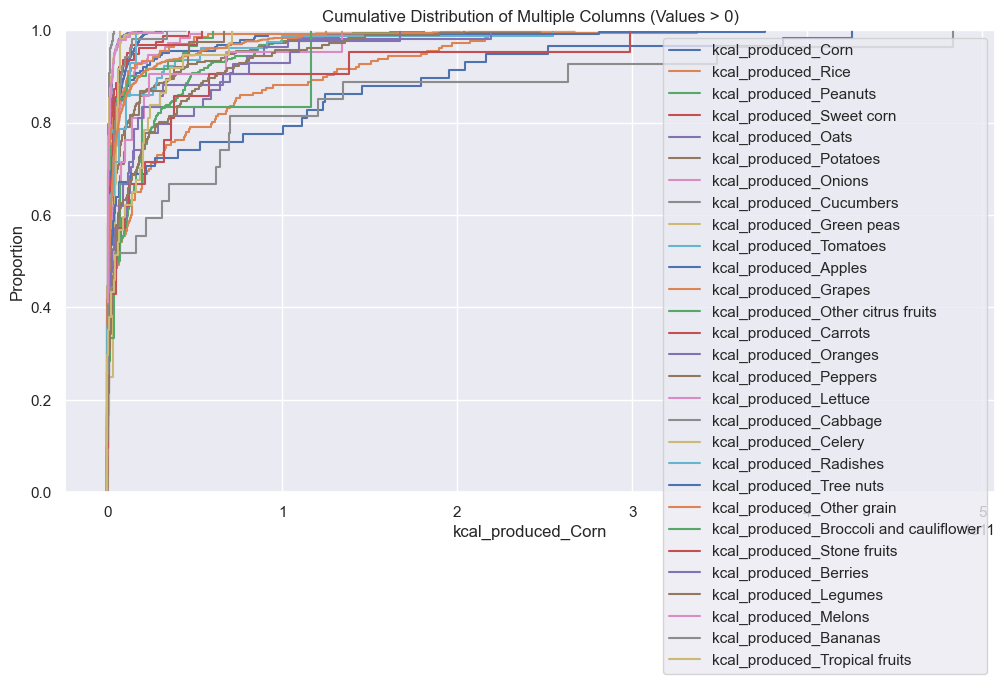

In [46]:
# Usage
ecdf_multiline(food, production_cols)

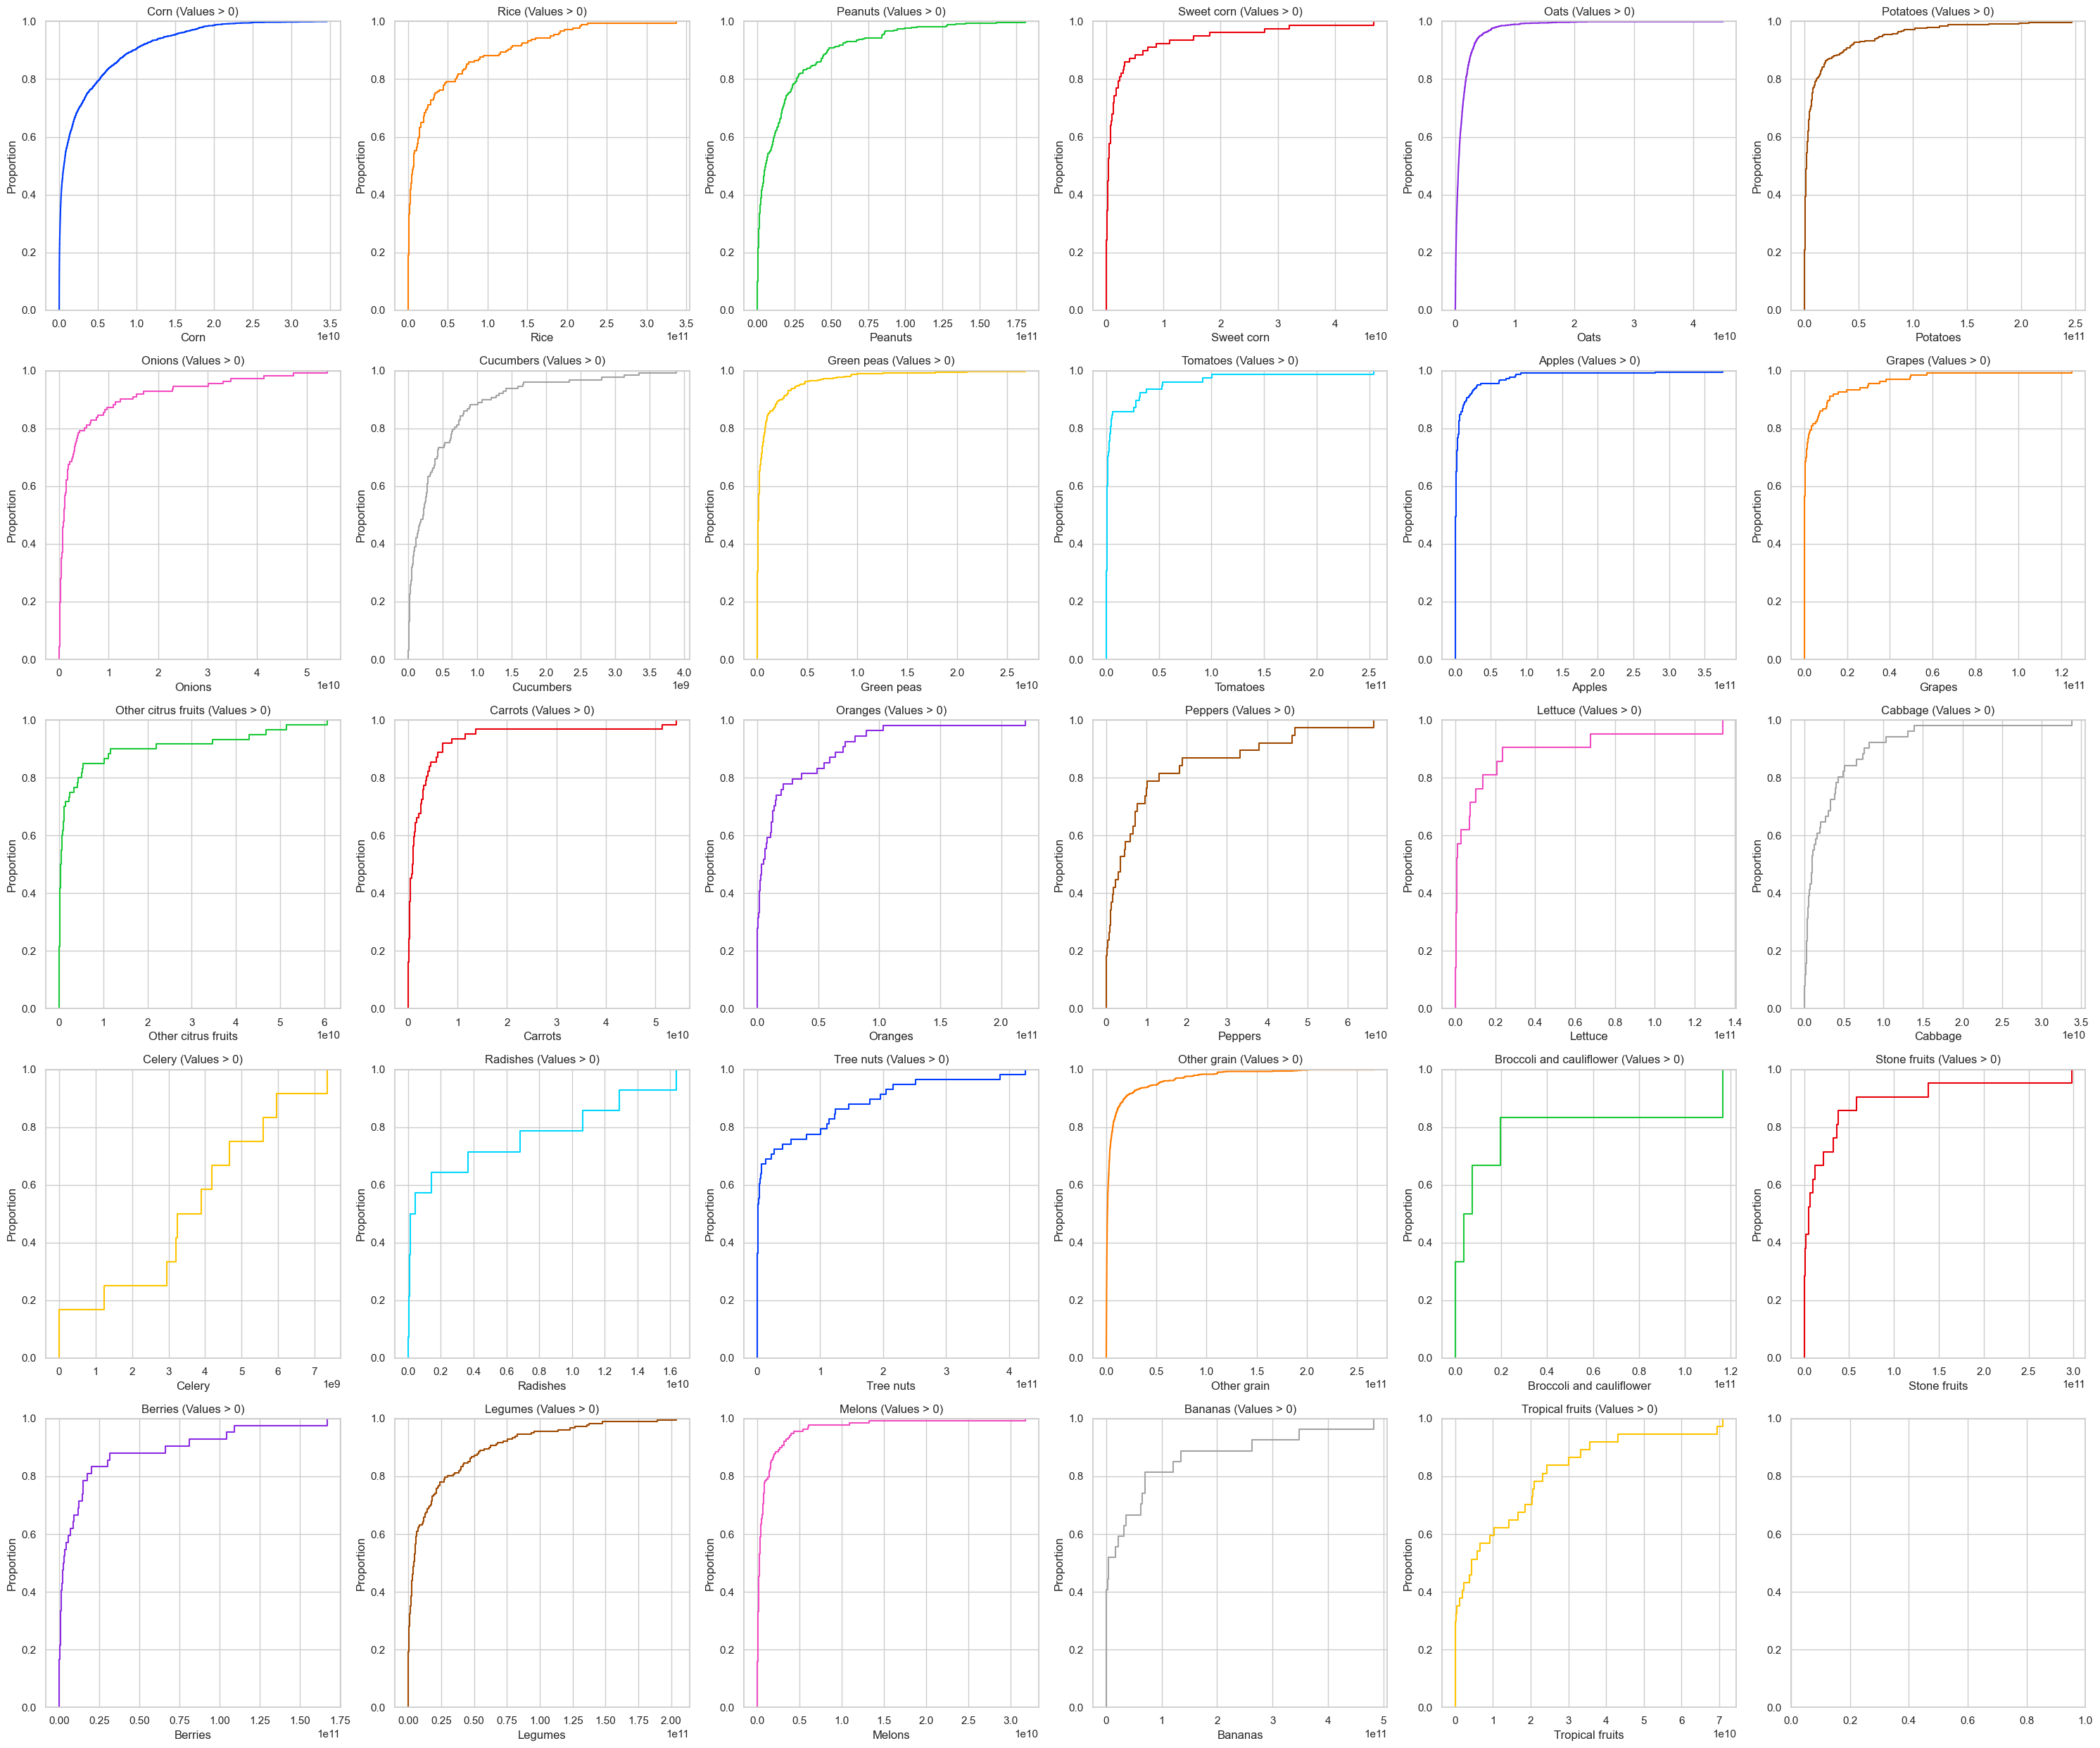

In [60]:
ecdf_multigraph(food, production_cols)

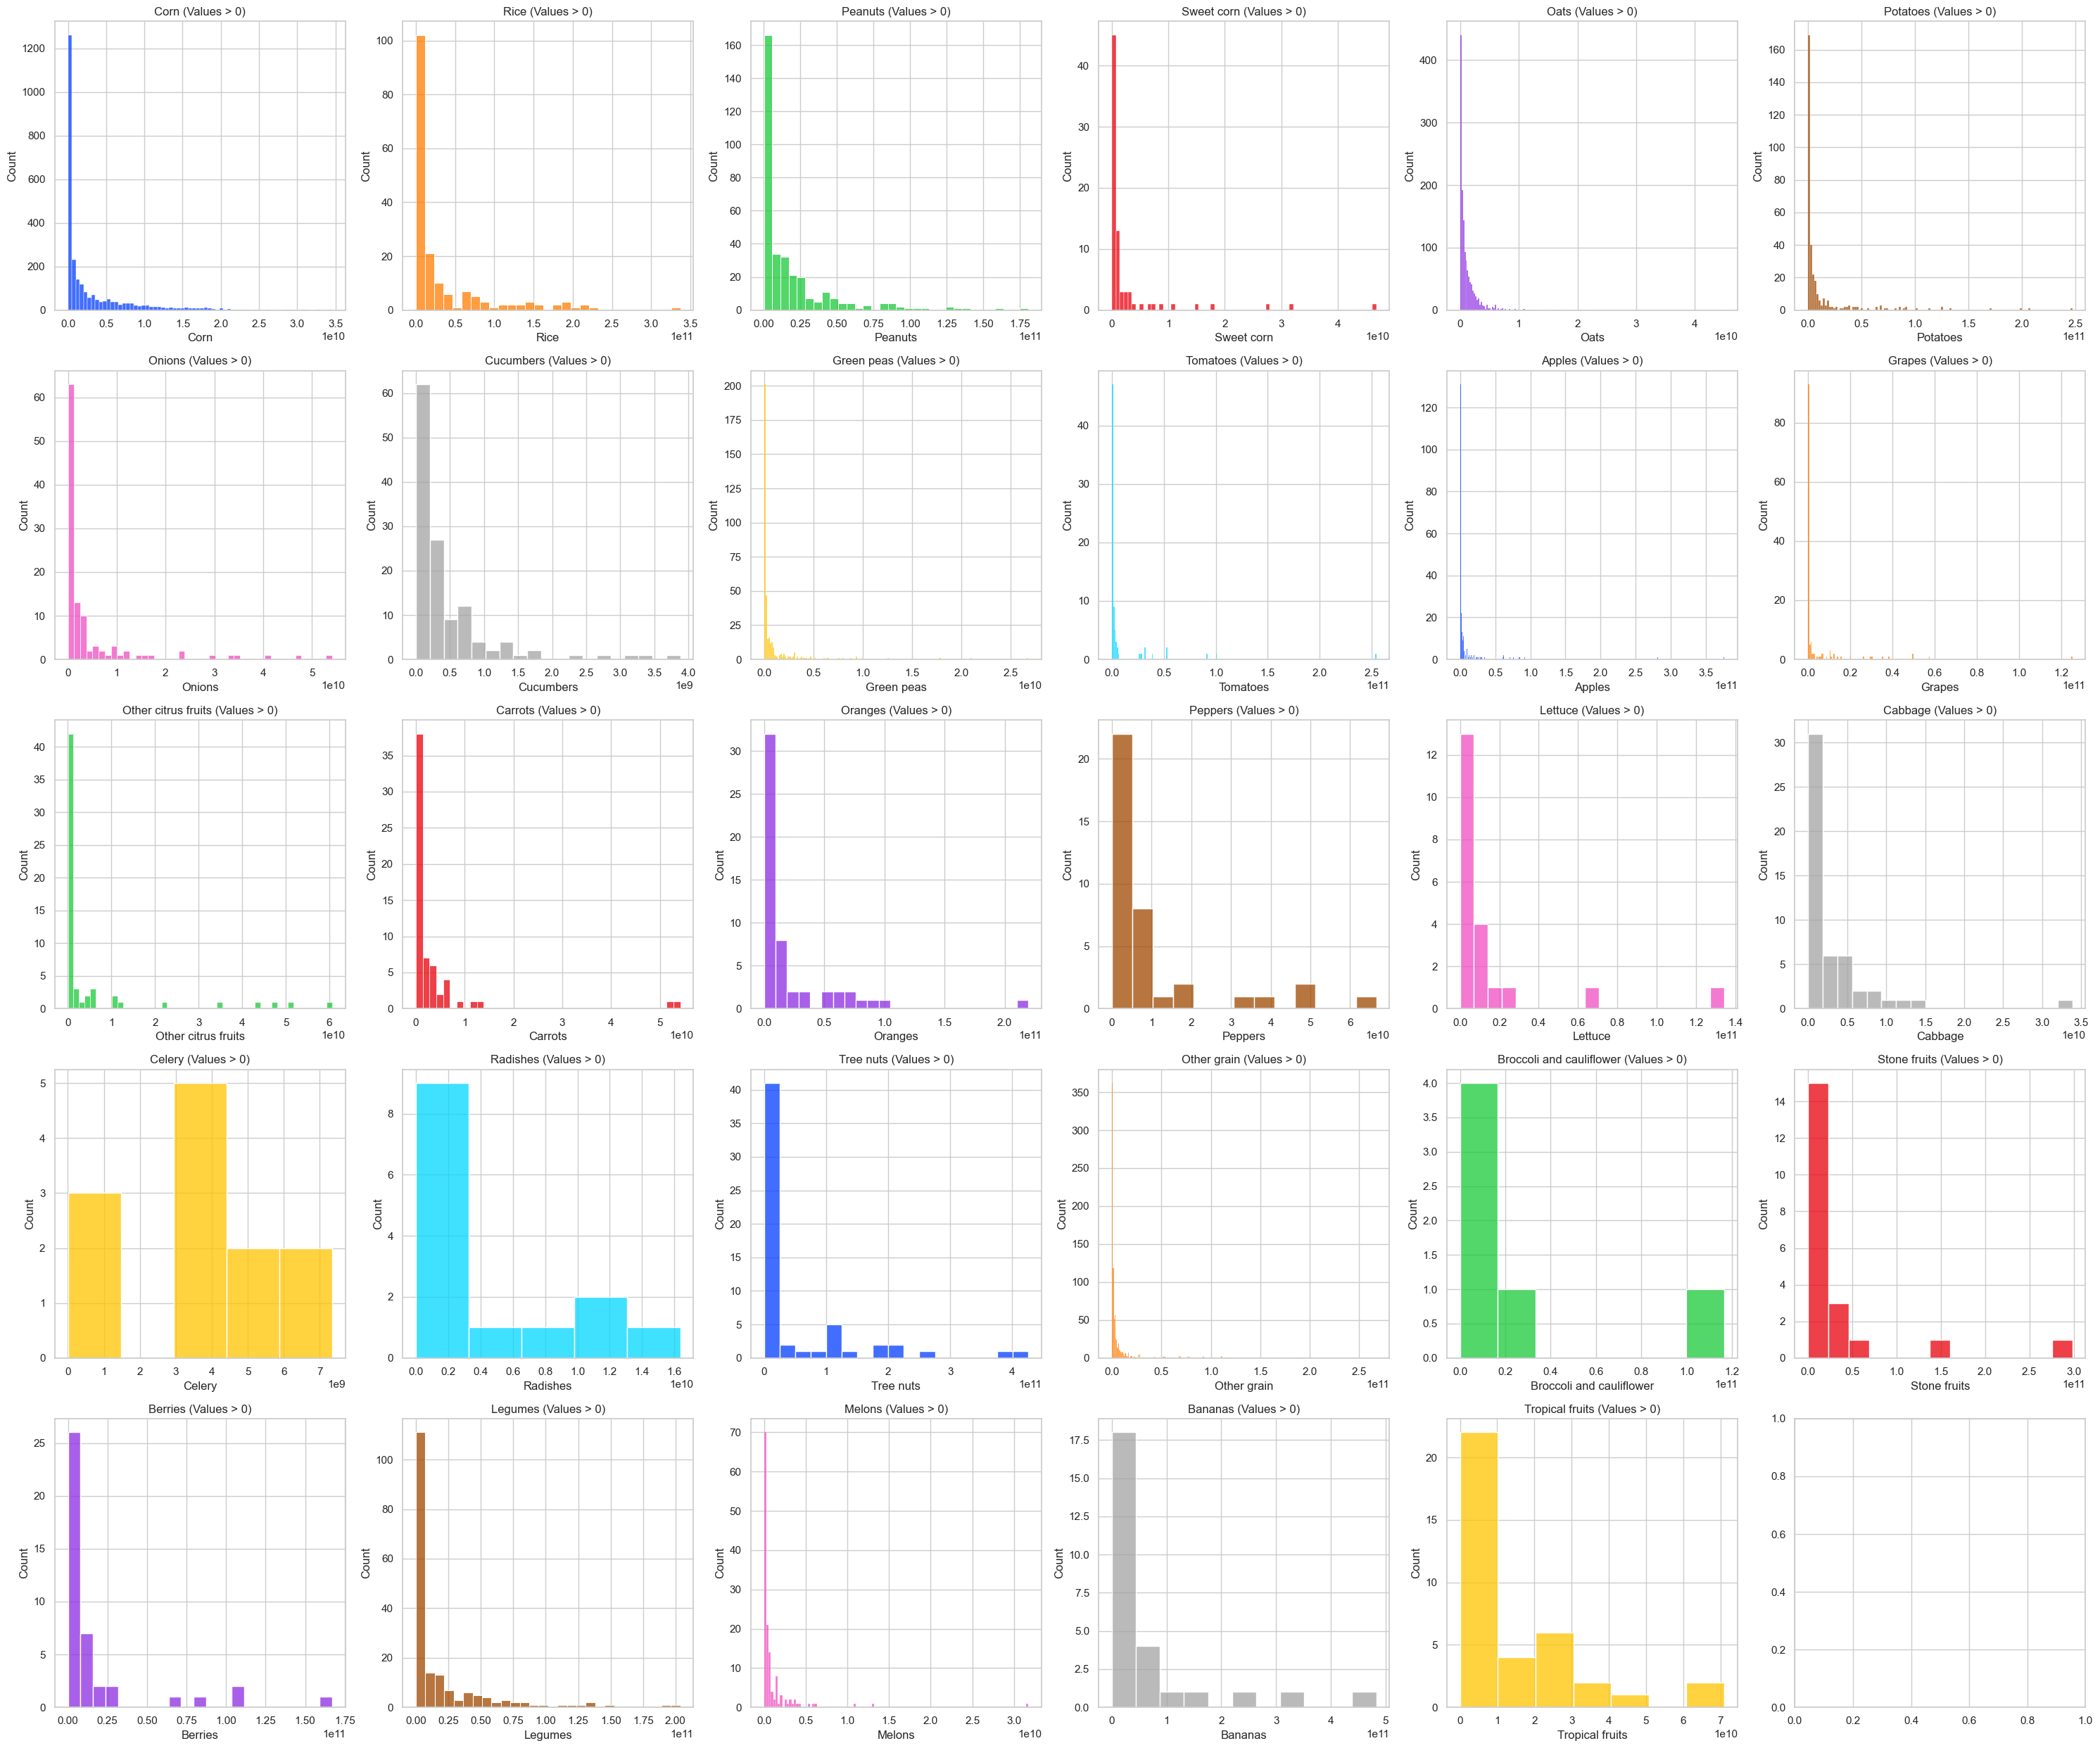

In [61]:
histogram_multigraph(food, production_cols)

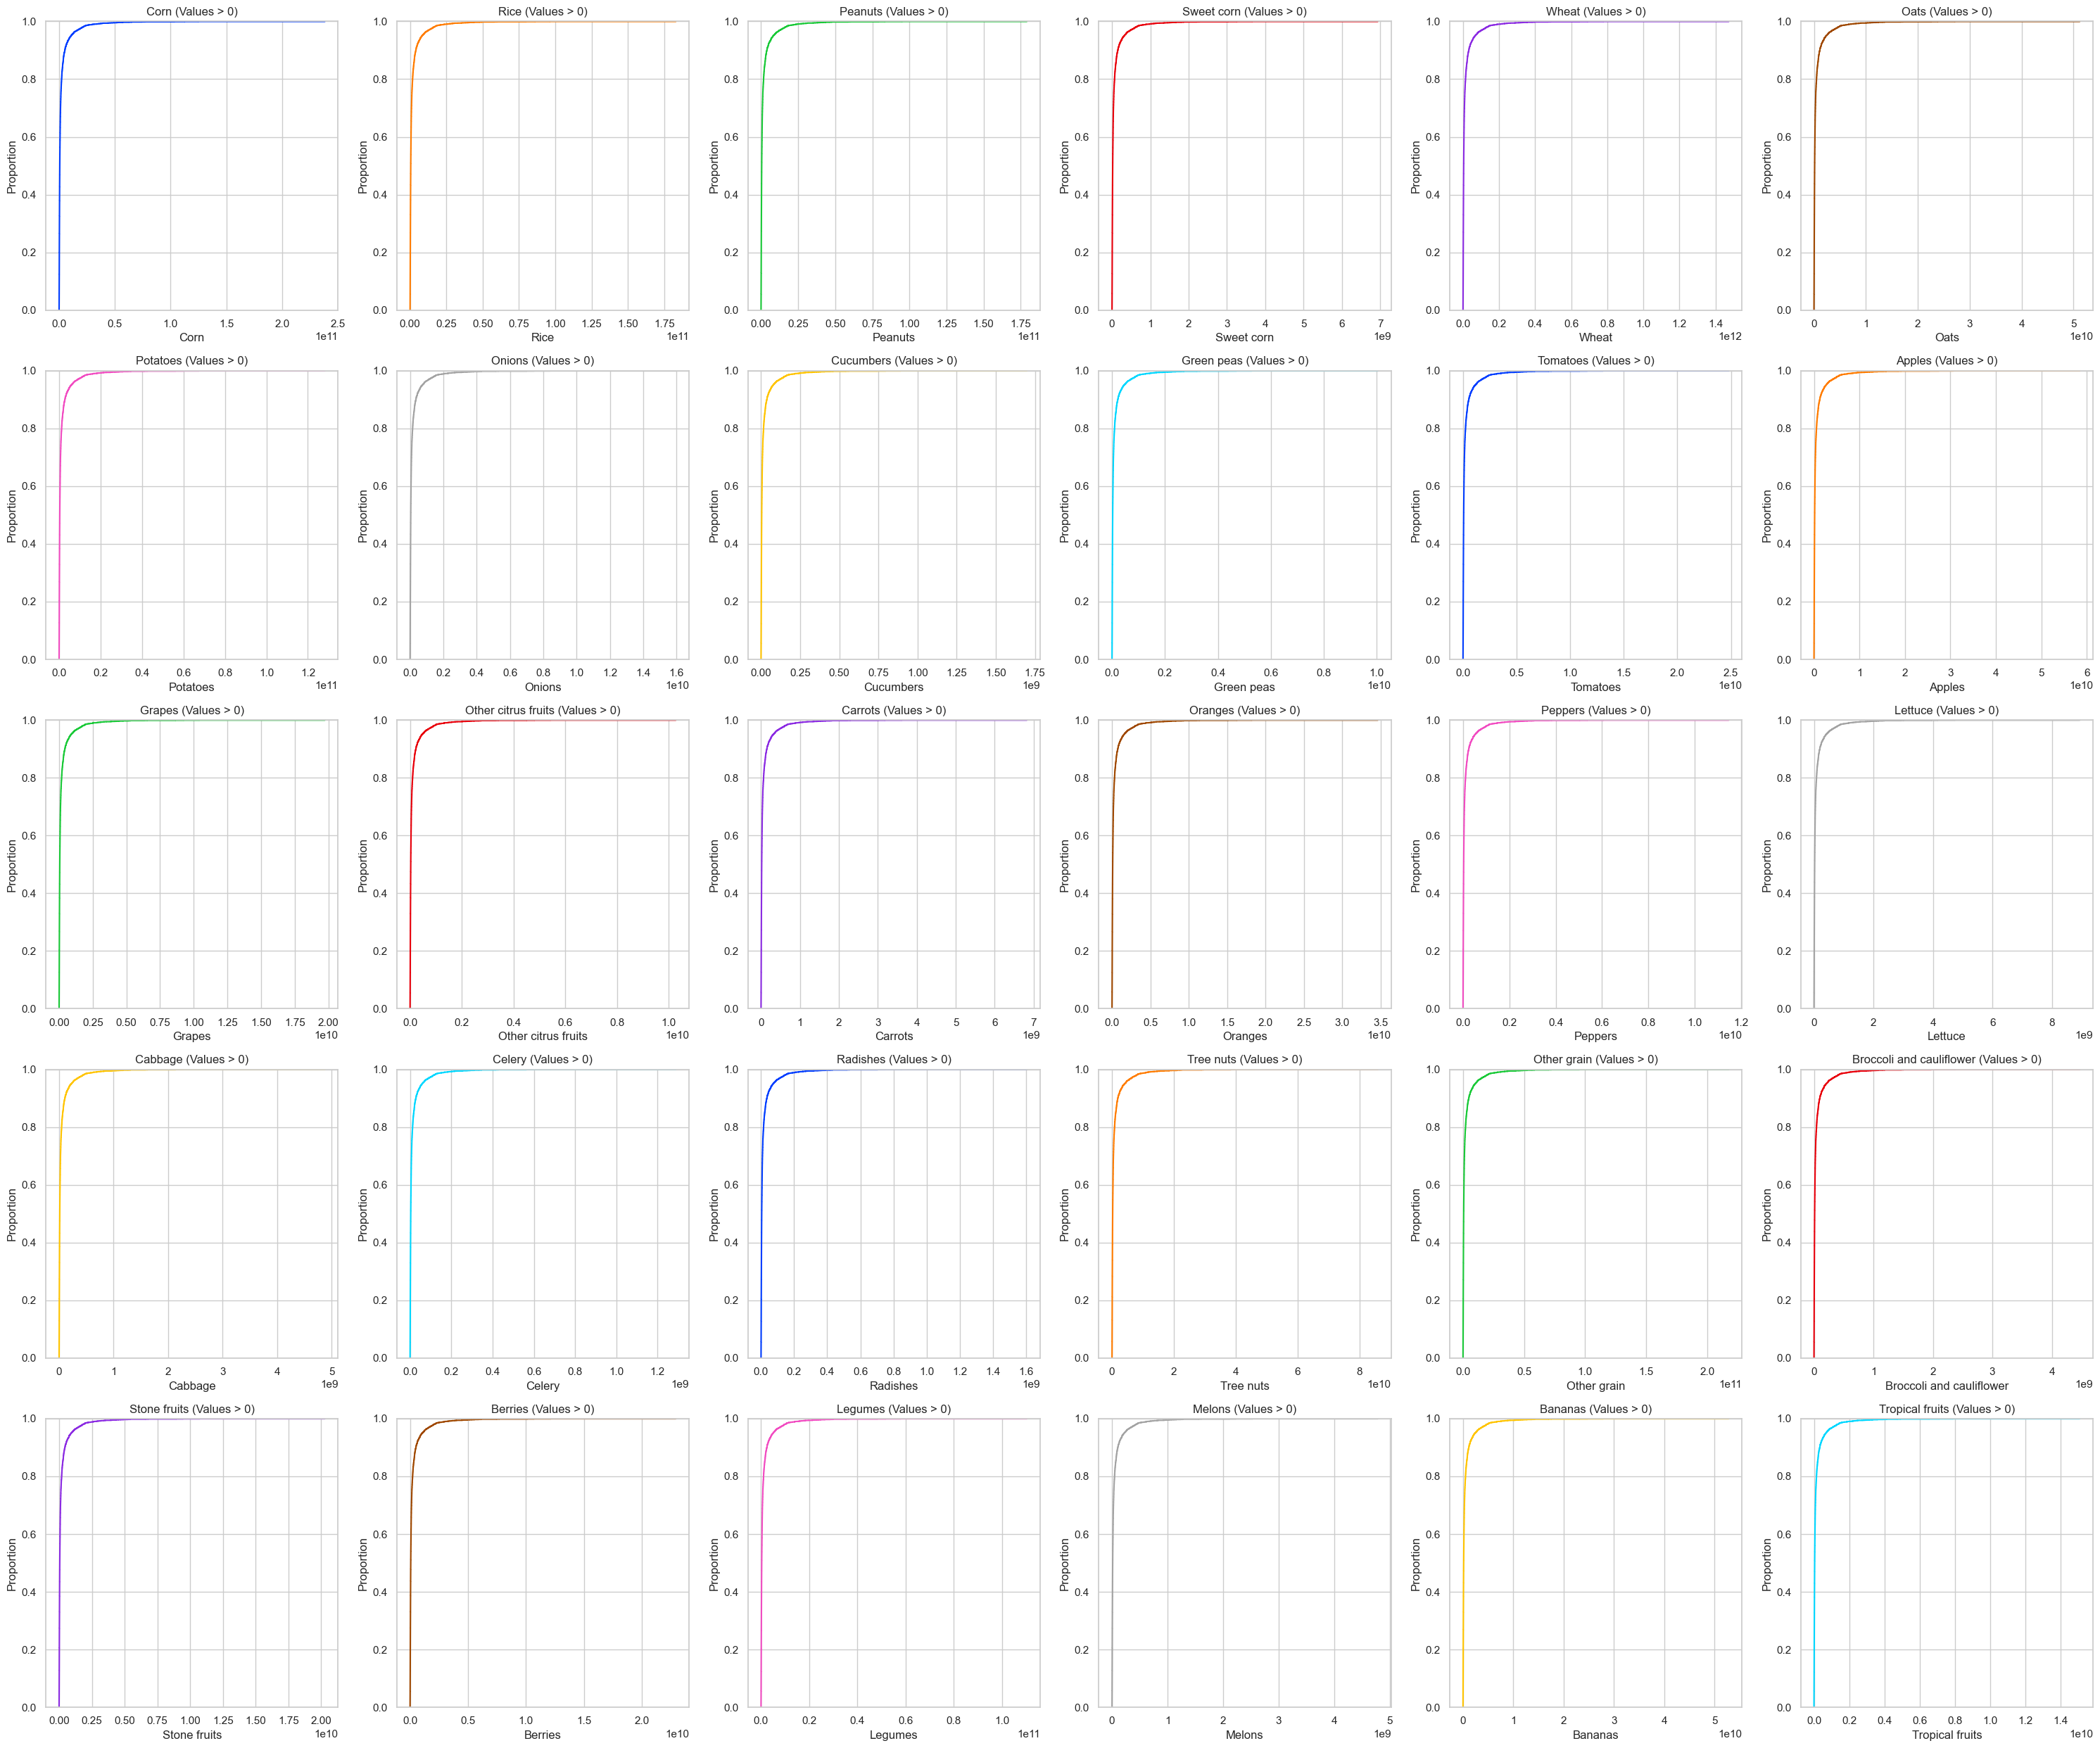

In [64]:
ecdf_multigraph(food, consumption_cols)

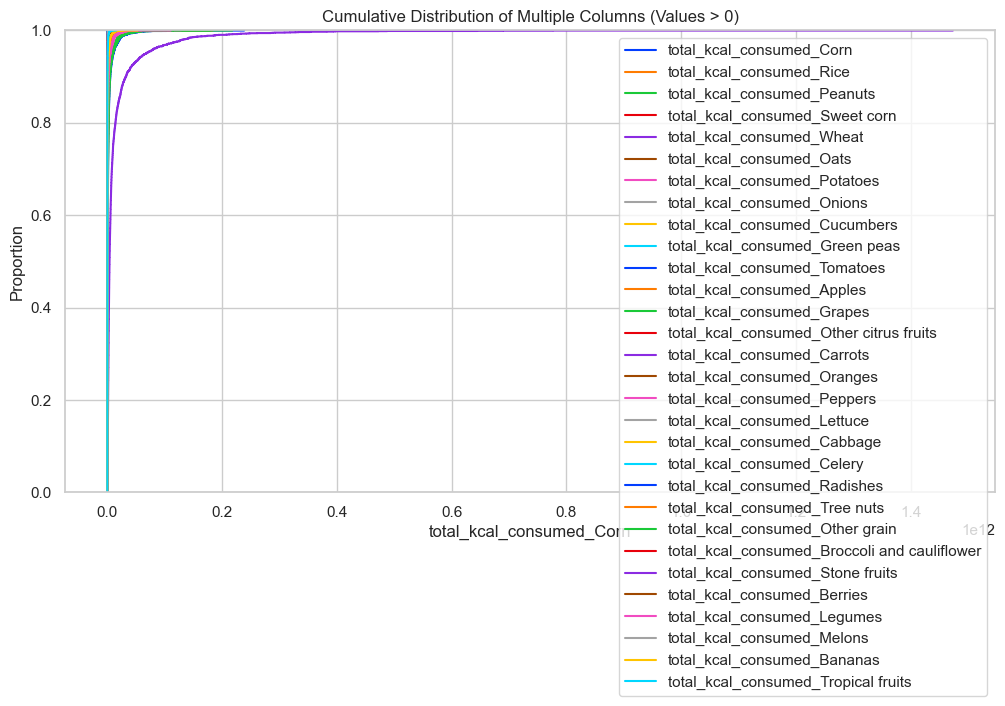

In [67]:
ecdf_multiline(food, consumption_cols)

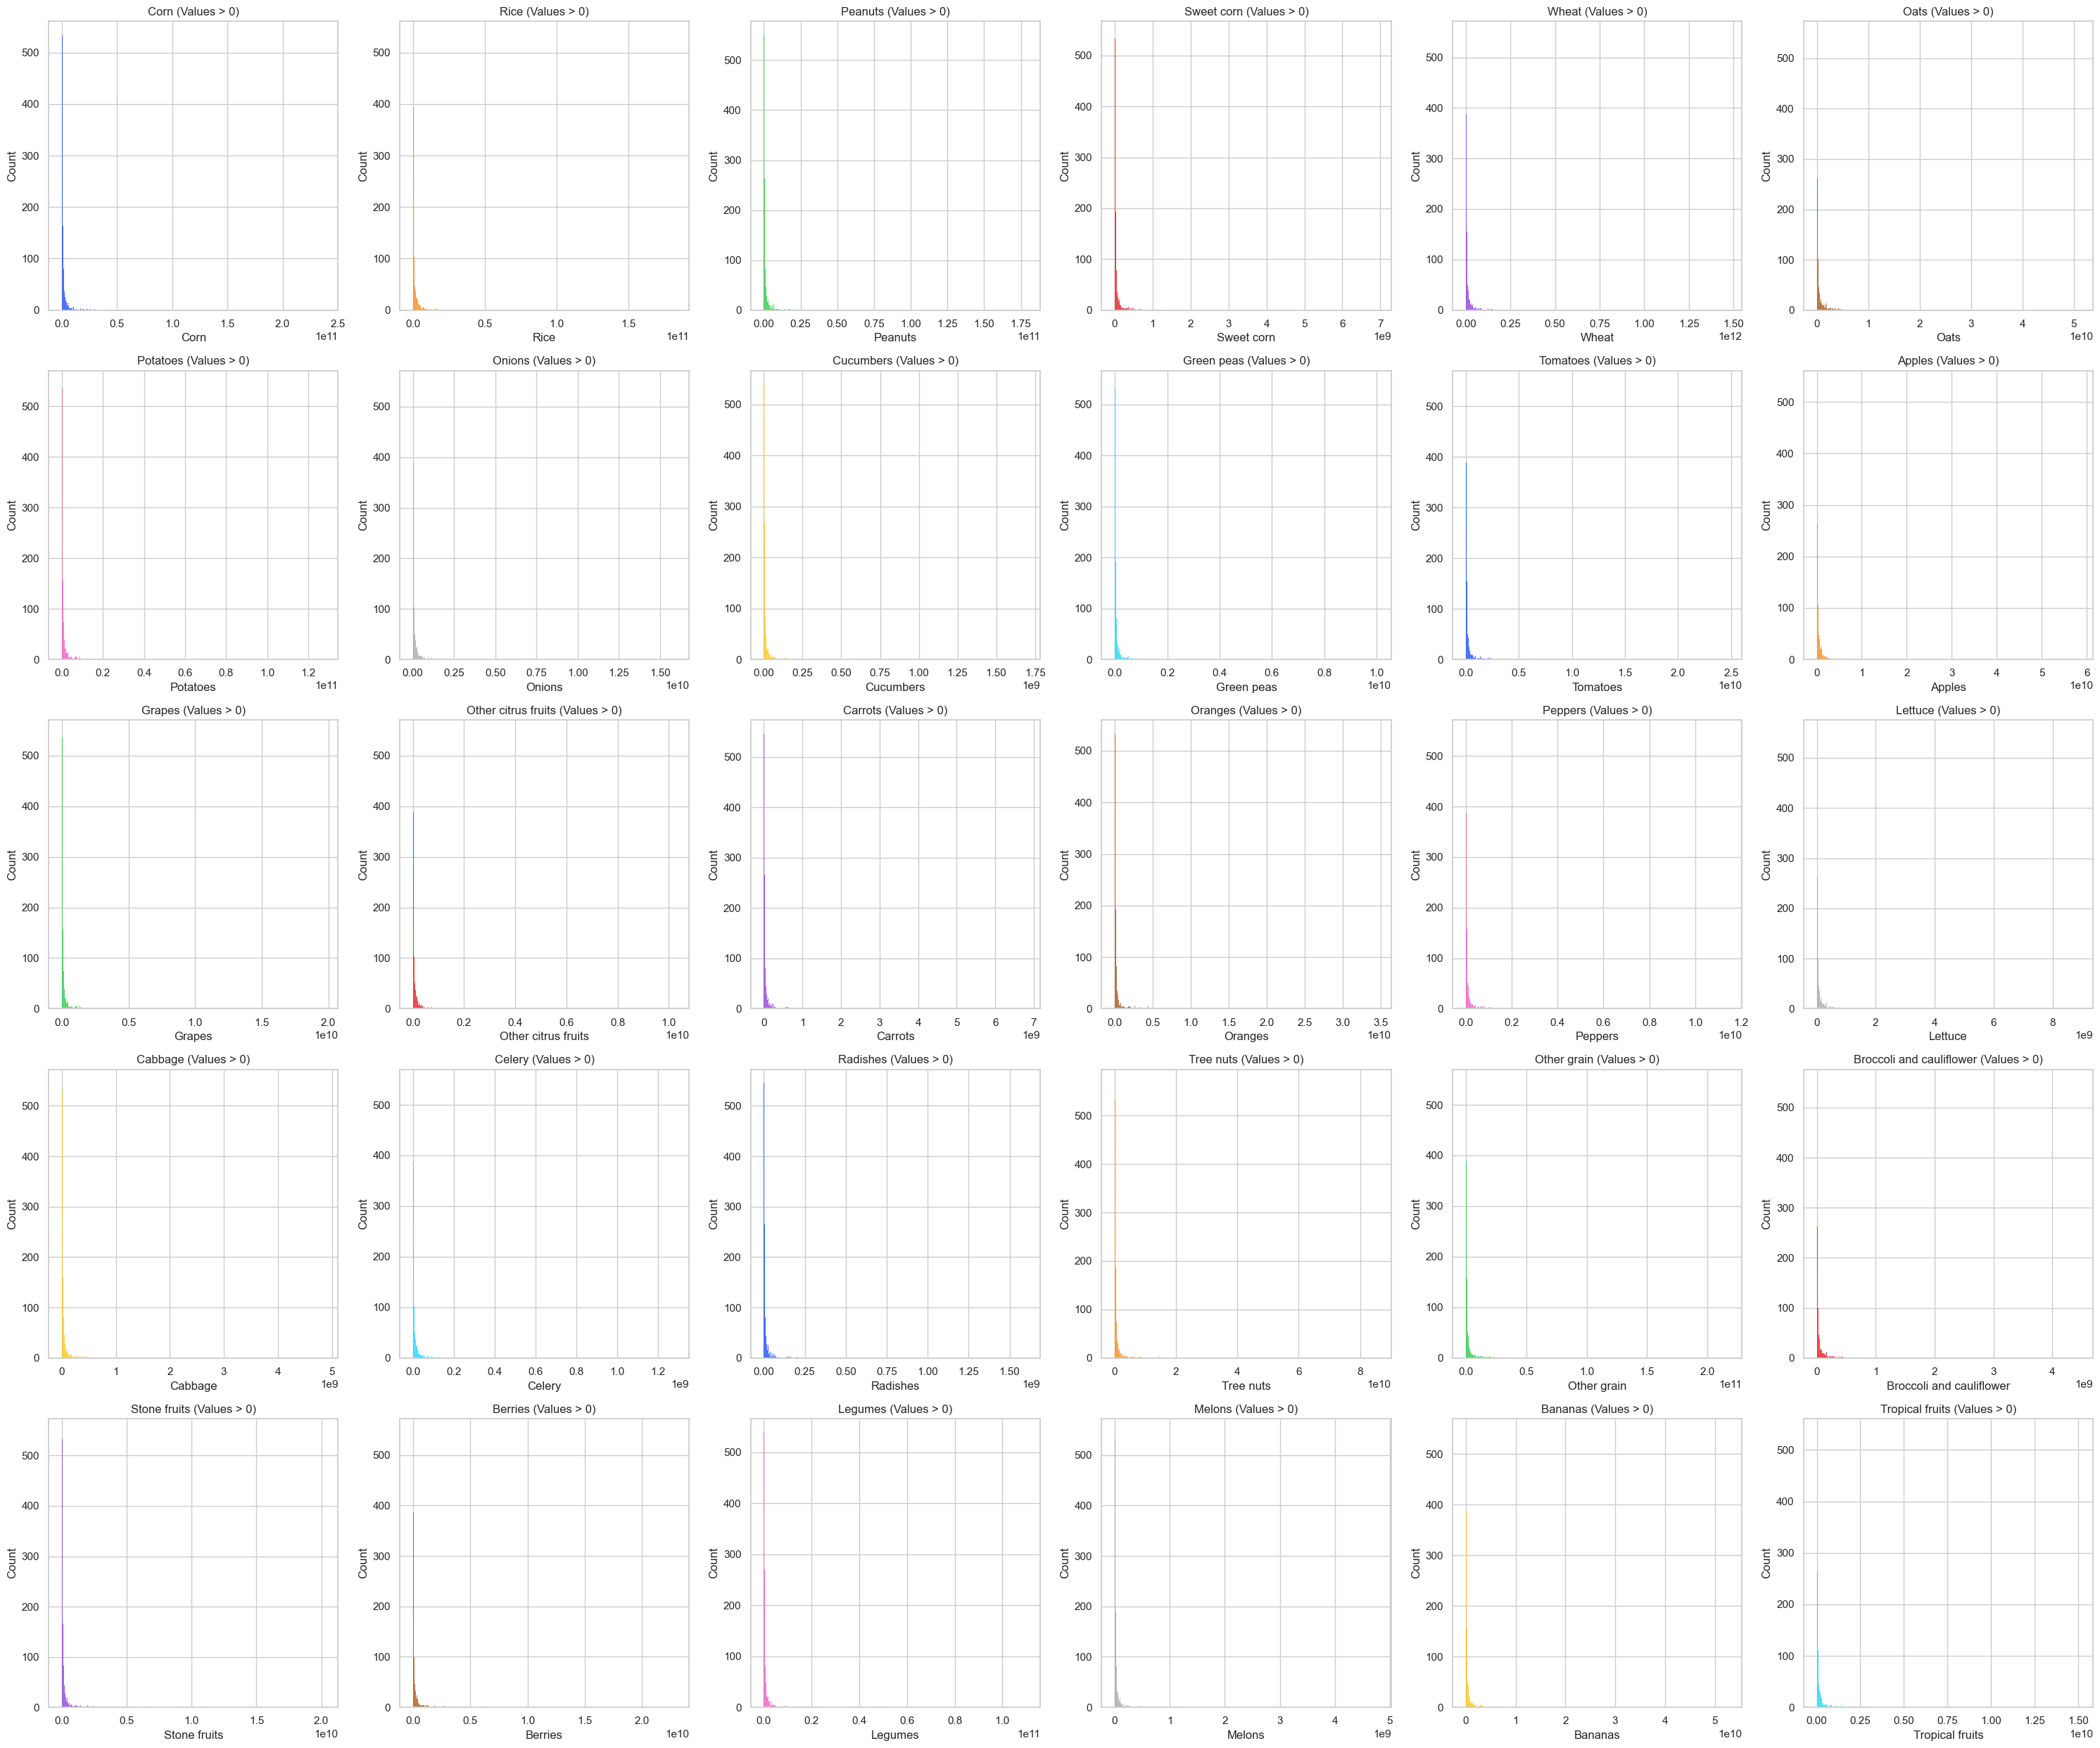

In [65]:
histogram_multigraph(food, consumption_cols)

# Production impacts Figures

In [12]:
heat = food[food.columns[food.columns.str.contains('heat') | food.columns.str.contains('geometry') | food.columns.str.contains('geoid')]]
heat = heat[heat.columns[~heat.columns.str.contains('kg')]]
# because the string heat is in wheat we need a few more qualifiers to create this dataframe
heat = heat[heat.columns[~heat.columns.str.contains('consumed')]]
heat = heat[heat.columns[~heat.columns.str.contains('drought')]]
heat = heat[heat.columns[~heat.columns.str.contains('kcal_produced_Wheat')]]


drought = food[food.columns[food.columns.str.contains('drought') | food.columns.str.contains('geometry') | food.columns.str.contains('geoid')]]
drought = drought[drought.columns[~drought.columns.str.contains('kg')]]

In [13]:
# for every column in heat that begins with kcal add the column with matching name from food but without the word heat
heat_cols = []
drought_cols = []
for c in heat.columns:
    if 'kcal' in c:
        heat_cols.append(c)
for c in drought.columns:
    if 'kcal' in c:
        drought_cols.append(c)

# remove the string "heat_" from the strings in heat_cols
food_cols = [s.replace('heat_', '') for s in heat_cols]
for c in food_cols:
    # add the column that matches c to heat dataframe
    heat[c] = food[c]
    drought[c] = food[c]

In [35]:
# double check to see if the lists have the columns in the same order
for i in range(len(heat_cols)):
    print (heat_cols[i])
    print (drought_cols[i])
    print (food_cols[i])

kcal_produced_heat_Corn
kcal_produced_drought_Corn
kcal_produced_Corn
kcal_produced_heat_Rice
kcal_produced_drought_Rice
kcal_produced_Rice
kcal_produced_heat_Peanuts
kcal_produced_drought_Peanuts
kcal_produced_Peanuts
kcal_produced_heat_Sweet corn
kcal_produced_drought_Sweet corn
kcal_produced_Sweet corn
kcal_produced_heat_Wheat
kcal_produced_drought_Wheat
kcal_produced_Wheat
kcal_produced_heat_Oats
kcal_produced_drought_Oats
kcal_produced_Oats
kcal_produced_heat_Potatoes
kcal_produced_drought_Potatoes
kcal_produced_Potatoes
kcal_produced_heat_Onions
kcal_produced_drought_Onions
kcal_produced_Onions
kcal_produced_heat_Cucumbers
kcal_produced_drought_Cucumbers
kcal_produced_Cucumbers
kcal_produced_heat_Green peas
kcal_produced_drought_Green peas
kcal_produced_Green peas
kcal_produced_heat_Tomatoes
kcal_produced_drought_Tomatoes
kcal_produced_Tomatoes
kcal_produced_heat_Apples
kcal_produced_drought_Apples
kcal_produced_Apples
kcal_produced_heat_Grapes
kcal_produced_drought_Grapes
kcal_p

In [36]:
for i in range(len(food_cols)):
    print ("delta_"+heat_cols[i])
    heat["delta_"+heat_cols[i]] = heat[food_cols[i]] - heat[heat_cols[i]]
    print ("delta_"+drought_cols[i])
    drought["delta_"+drought_cols[i]] = drought[food_cols[i]] - drought[drought_cols[i]]

delta_kcal_produced_heat_Corn
delta_kcal_produced_drought_Corn
delta_kcal_produced_heat_Rice
delta_kcal_produced_drought_Rice
delta_kcal_produced_heat_Peanuts
delta_kcal_produced_drought_Peanuts
delta_kcal_produced_heat_Sweet corn
delta_kcal_produced_drought_Sweet corn
delta_kcal_produced_heat_Wheat
delta_kcal_produced_drought_Wheat
delta_kcal_produced_heat_Oats
delta_kcal_produced_drought_Oats
delta_kcal_produced_heat_Potatoes
delta_kcal_produced_drought_Potatoes
delta_kcal_produced_heat_Onions
delta_kcal_produced_drought_Onions
delta_kcal_produced_heat_Cucumbers
delta_kcal_produced_drought_Cucumbers
delta_kcal_produced_heat_Green peas
delta_kcal_produced_drought_Green peas
delta_kcal_produced_heat_Tomatoes
delta_kcal_produced_drought_Tomatoes
delta_kcal_produced_heat_Apples
delta_kcal_produced_drought_Apples
delta_kcal_produced_heat_Grapes
delta_kcal_produced_drought_Grapes
delta_kcal_produced_heat_Other citrus fruits
delta_kcal_produced_drought_Other citrus fruits
delta_kcal_produce

In [40]:
drought

geoid  kcal_produced_drought_Corn  kcal_produced_drought_Rice  \
0      1001                         NaN                         NaN   
1      1003                         NaN                         NaN   
2      1005                         NaN                         NaN   
3      1007                         NaN                         NaN   
4      1009                         NaN                         NaN   
...     ...                         ...                         ...   
3103  56037                         NaN                         NaN   
3104  56039                         NaN                         NaN   
3105  56041                         NaN                         NaN   
3106  56043                         NaN                         NaN   
3107  56045                         NaN                         NaN   

      kcal_produced_drought_Peanuts  kcal_produced_drought_Sweet corn  \
0                      8.857548e+08                               NaN   
1                      1.029031e+11                               NaN   
2                               NaN                               NaN   
3                               NaN                               NaN   
4                               NaN                               NaN   
...                             ...                               ...   
3103                            NaN                               NaN   
3104                            NaN                               NaN   
3105                            NaN                               NaN   
3106                            NaN                               NaN   
3107                            NaN                               NaN   

      kcal_produced_drought_Wheat  kcal_produced_drought_Oats  \
0                             NaN                         NaN   
1                             NaN                         NaN   
2                             NaN                         NaN   
3                             NaN                         NaN   
4                             NaN                         NaN   
...                           ...                         ...   
3103                          NaN                         NaN   
3104                          NaN                         NaN   
3105                          NaN                         NaN   
3106                          NaN                         NaN   
3107                          NaN                         NaN   

      kcal_produced_drought_Potatoes  kcal_produced_drought_Onions  \
0                                NaN                           NaN   
1                       1.752034e+09                           NaN   
2                                NaN                           NaN   
3                                NaN                           NaN   
4                                NaN                           NaN   
...                              ...                           ...   
3103                             NaN                           NaN   
3104                             NaN                           NaN   
3105                             NaN                           NaN   
3106                             NaN                           NaN   
3107                             NaN                           NaN   

      kcal_produced_drought_Cucumbers  kcal_produced_drought_Green peas  \
0                                 NaN                               NaN   
1                                 NaN                               NaN   
2                                 NaN                               NaN   
3                                 NaN                               NaN   
4                                 NaN                               NaN   
...                               ...                               ...   
3103                              NaN                               NaN   
3104                              NaN                 

In [38]:
# production_climate_impacts = heat without the column names in food_cols or geoid columns
production_climate_impacts = heat.copy()
# add all columns from drought to production_climate_impacts
for c in drought.columns:
    if c not in production_climate_impacts.columns:
        production_climate_impacts[c] = drought[c]

In [50]:
# make production_climate_impacts[delta_kcal_produced_heat_Total] the sum of all delta_kcal_produced_heat_ columns
production_climate_impacts['delta_kcal_produced_heat_Total'] = production_climate_impacts[production_climate_impacts.columns[production_climate_impacts.columns.str.contains('delta_kcal_produced_heat_')]].sum(axis=1)
production_climate_impacts['delta_kcal_produced_drought_Total'] = production_climate_impacts[production_climate_impacts.columns[production_climate_impacts.columns.str.contains('delta_kcal_produced_drought_')]].sum(axis=1)


In [51]:
# write production_climate_impacts to geojson
production_climate_impacts.to_file("./output-data/production-climate-impacts.geojson", driver='GeoJSON')
production_climate_impacts.to_csv("./output-data/production-climate-impacts.csv")

In [69]:
production_climate_impacts

geoid  kcal_produced_heat_Corn  kcal_produced_heat_Rice  \
0      1001                      NaN                      NaN   
1      1003                      NaN                      NaN   
2      1005                      NaN                      NaN   
3      1007                      NaN                      NaN   
4      1009                      NaN                      NaN   
...     ...                      ...                      ...   
3103  56037                      NaN                      NaN   
3104  56039                      NaN                      NaN   
3105  56041                      NaN                      NaN   
3106  56043                      NaN                      NaN   
3107  56045                      NaN                      NaN   

      kcal_produced_heat_Peanuts  kcal_produced_heat_Sweet corn  \
0                   8.238835e+08                            NaN   
1                   1.063920e+11                            NaN   
2                   5.223025e+09                            NaN   
3                            NaN                            NaN   
4                   5.372048e+08                            NaN   
...                          ...                            ...   
3103                         NaN                            NaN   
3104                         NaN                            NaN   
3105                         NaN                            NaN   
3106                         NaN                            NaN   
3107                         NaN                            NaN   

      kcal_produced_heat_Wheat  kcal_produced_heat_Oats  \
0                          NaN                      NaN   
1                          NaN                      NaN   
2                          NaN                      NaN   
3                          NaN                      NaN   
4                          NaN                      NaN   
...                        ...                      ...   
3103                       NaN                      NaN   
3104                       NaN                      NaN   
3105                       NaN                      NaN   
3106                       NaN                      NaN   
3107                       NaN                      NaN   

      kcal_produced_heat_Potatoes  kcal_produced_heat_Onions  \
0                             NaN                        NaN   
1                    1.706062e+09                        NaN   
2                             NaN                        NaN   
3                             NaN                        NaN   
4                             NaN                        NaN   
...                           ...                        ...   
3103                          NaN                        NaN   
3104                          NaN                        NaN   
3105                          NaN                        NaN   
3106                          NaN                        NaN   
3107                          NaN                        NaN   

      kcal_produced_heat_Cucumbers  kcal_produced_heat_Green peas  \
0                              NaN                            NaN   
1                              NaN                            NaN   
2                              NaN                            NaN   
3                              NaN                            NaN   
4                              NaN                            NaN   
...                            ...                            ...   
3103                           NaN                            NaN   
3104                           NaN                            NaN   
3105                           NaN                            NaN   
3106                           NaN                            NaN   
3107                           NaN                            NaN   

      kcal_produced_heat_Tomatoes  kcal_produced_heat_Apples  \
0                             NaN                

In [91]:
production_climate_impacts_relative = production_climate_impacts.copy()

for i in range(len(food_cols)):
    food_col_name = food_cols[i]
    heat_col_name = heat_cols[i]
    drought_col_name = drought_cols[i]

    # Calculate the sum of the values in the food_col_name
    food_col_sum = production_climate_impacts_relative[food_col_name].sum()

    # Normalize the columns to represent percentages
    production_climate_impacts_relative[food_col_name] = production_climate_impacts_relative[food_col_name] / food_col_sum
    production_climate_impacts_relative[heat_col_name] = production_climate_impacts_relative[heat_col_name] / food_col_sum
    production_climate_impacts_relative[drought_col_name] = production_climate_impacts_relative[drought_col_name] / food_col_sum

    # Calculate the delta columns
    production_climate_impacts_relative["delta_" + heat_col_name] = production_climate_impacts_relative[food_col_name] - production_climate_impacts_relative[heat_col_name]
    production_climate_impacts_relative["delta_" + drought_col_name] = production_climate_impacts_relative[food_col_name] - production_climate_impacts_relative[drought_col_name]

# Calculate the total delta columns
production_climate_impacts_relative['delta_kcal_produced_heat_Total'] = production_climate_impacts_relative[["delta_" + col for col in heat_cols]].sum(axis=1)
production_climate_impacts_relative['delta_kcal_produced_drought_Total'] = production_climate_impacts_relative[["delta_" + col for col in drought_cols]].sum(axis=1)

production_climate_impacts_relative

geoid  kcal_produced_heat_Corn  kcal_produced_heat_Rice  \
0      1001                      NaN                      NaN   
1      1003                      NaN                      NaN   
2      1005                      NaN                      NaN   
3      1007                      NaN                      NaN   
4      1009                      NaN                      NaN   
...     ...                      ...                      ...   
3103  56037                      NaN                      NaN   
3104  56039                      NaN                      NaN   
3105  56041                      NaN                      NaN   
3106  56043                      NaN                      NaN   
3107  56045                      NaN                      NaN   

      kcal_produced_heat_Peanuts  kcal_produced_heat_Sweet corn  \
0                       0.000139                            NaN   
1                       0.018003                            NaN   
2                       0.000884                            NaN   
3                            NaN                            NaN   
4                       0.000091                            NaN   
...                          ...                            ...   
3103                         NaN                            NaN   
3104                         NaN                            NaN   
3105                         NaN                            NaN   
3106                         NaN                            NaN   
3107                         NaN                            NaN   

      kcal_produced_heat_Wheat  kcal_produced_heat_Oats  \
0                          NaN                      NaN   
1                          NaN                      NaN   
2                          NaN                      NaN   
3                          NaN                      NaN   
4                          NaN                      NaN   
...                        ...                      ...   
3103                       NaN                      NaN   
3104                       NaN                      NaN   
3105                       NaN                      NaN   
3106                       NaN                      NaN   
3107                       NaN                      NaN   

      kcal_produced_heat_Potatoes  kcal_produced_heat_Onions  \
0                             NaN                        NaN   
1                        0.000406                        NaN   
2                             NaN                        NaN   
3                             NaN                        NaN   
4                             NaN                        NaN   
...                           ...                        ...   
3103                          NaN                        NaN   
3104                          NaN                        NaN   
3105                          NaN                        NaN   
3106                          NaN                        NaN   
3107                          NaN                        NaN   

      kcal_produced_heat_Cucumbers  kcal_produced_heat_Green peas  \
0                              NaN                            NaN   
1                              NaN                            NaN   
2                              NaN                            NaN   
3                              NaN                            NaN   
4                              NaN                            NaN   
...                            ...                            ...   
3103                           NaN                            NaN   
3104                           NaN                            NaN   
3105                           NaN                            NaN   
3106                           NaN                            NaN   
3107                           NaN                            NaN   

      kcal_produced_heat_Tomatoes  kcal_produced_heat_Apples  \
0                             NaN                

In [94]:
for i in range(len(food_cols)):
    food_col_name = food_cols[i]
    heat_col_name = heat_cols[i]
    drought_col_name = drought_cols[i]
    # print (food_col_name, production_climate_impacts_relative[food_col_name].sum() - production_climate_impacts_relative[heat_col_name].sum()+production_climate_impacts_relative["delta_"+heat_col_name].sum())
    print(food_col_name, production_climate_impacts_relative[food_col_name].sum())
    print (production_climate_impacts_relative["delta_"+heat_col_name].sum())

kcal_produced_Corn 1.0
0.00044111870438329475
kcal_produced_Rice 1.0
0.000570421602464264
kcal_produced_Peanuts 0.9999999999999999
0.049446119478089995
kcal_produced_Sweet corn 1.0
0.02667813013799742
kcal_produced_Wheat 1.0
0.0005956582943645406
kcal_produced_Oats 1.0
5.286267022632318e-05
kcal_produced_Potatoes 1.0
0.042167815358273006
kcal_produced_Onions 0.9999999999999999
1.908331999367352e-12
kcal_produced_Cucumbers 1.0
0.08936427800770506
kcal_produced_Green peas 0.9999999999999999
0.008775184231231825
kcal_produced_Tomatoes 0.9999999999999998
0.0802686318503783
kcal_produced_Apples 1.0
0.11313218146381335
kcal_produced_Grapes 1.0
0.08203805710364866
kcal_produced_Other citrus fruits 1.0
0.07825277672822004
kcal_produced_Carrots 1.0
0.07779632647978824
kcal_produced_Oranges 1.0
0.07222961795164233
kcal_produced_Peppers 0.9999999999999999
0.04715397749974368
kcal_produced_Lettuce 1.0
0.004254790312761721
kcal_produced_Cabbage 1.0
0.03338616355151868
kcal_produced_Celery 0.9999999

In [79]:
# print the sum of each column in production_climate_impacts_relative
for c in production_climate_impacts_relative.columns:
    try:
        print (c, production_climate_impacts_relative[c].sum())
    except:
        print("skipping ", c)

geoid 95328061
kcal_produced_heat_Corn 1.7211427292028608e-05
kcal_produced_heat_Rice 0.029575231694149
kcal_produced_heat_Peanuts 0.7917624669539768
kcal_produced_heat_Sweet corn 0.840685447525145
kcal_produced_heat_Wheat 0.0021278994233375364
kcal_produced_heat_Oats 0.0007956081268809613
kcal_produced_heat_Potatoes 0.9216449443852271
kcal_produced_heat_Onions 0.061826415923705934
kcal_produced_heat_Cucumbers 0.7336996113777907
kcal_produced_heat_Green peas 0.1888104837712115
kcal_produced_heat_Tomatoes 0.9163105908072696
kcal_produced_heat_Apples 0.849183837798962
kcal_produced_heat_Grapes 0.8936928463359746
kcal_produced_heat_Other citrus fruits 0.7045811333129997
kcal_produced_heat_Carrots 0.9112408967614666
kcal_produced_heat_Oranges 0.4713997269642466
kcal_produced_heat_Peppers 0.5812377010407911
kcal_produced_heat_Lettuce 0.3309106889391384
kcal_produced_heat_Cabbage 0.7285004450034003
kcal_produced_heat_Celery 0.9700535265647747
kcal_produced_heat_Radishes 0
kcal_produced_heat_

# Making impact figures

In [4]:
production_climate_impacts = gpd.read_file('./output-data/production-climate-impacts.geojson')

In [15]:
crop_list = []
for c in drought_cols:
    crop_list.append(c.split('_')[-1])
print (crop_list)

['Corn', 'Rice', 'Peanuts', 'Sweet corn', 'Wheat', 'Oats', 'Potatoes', 'Onions', 'Cucumbers', 'Green peas', 'Tomatoes', 'Apples', 'Grapes', 'Other citrus fruits', 'Carrots', 'Oranges', 'Peppers', 'Lettuce', 'Cabbage', 'Celery', 'Radishes', 'Tree nuts', 'Other grain', 'Broccoli and cauliflower', 'Stone fruits', 'Berries', 'Legumes', 'Melons', 'Bananas', 'Tropical fruits']


In [146]:
# color options ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']
def impact_interactive_map(gdf, column_name, color_scheme, title):

    fig = px.choropleth_mapbox(gdf, geojson=gdf.geometry, locations=gdf.index, color=column_name,
                            color_continuous_scale=color_scheme,
                            range_color=(gdf[column_name].min(), gdf[column_name].max()),
                            mapbox_style="carto-positron",
                            zoom=3, center = {"lat": 37.0902, "lon": -95.7129},
                            opacity=0.5,
                            labels={column_name:title}
                            )
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    fig.show()

def impact_static_map(gdf, column_name, color_scheme, file_path, title ):

    # Plot the outlines of all counties
    gdf.boundary.plot(ax=plt.gca(), color='black', linewidth=0.05)

    # Plot the shaded counties with values for column_name
    gdf[gdf[column_name].notna()].plot(column=column_name, cmap=color_scheme, legend=False, ax=plt.gca(), figsize=(20, 10))
    # save to file at 600dpi
    plt.title(title)
    plt.axis('off')  # Turn off the axis
    # plt.legend(column_name)
    plt.savefig(file_path, bbox_inches='tight', dpi=600, )
    plt.show()

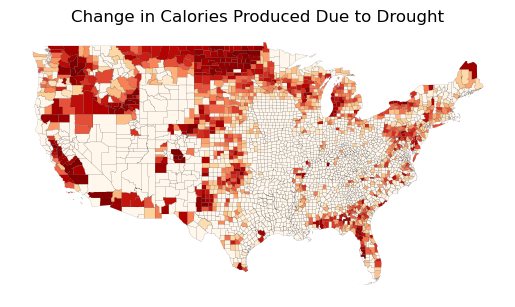

In [140]:
impact_static_map(production_climate_impacts, "delta_kcal_produced_drought_Total", "OrRd", "./output-data/figures/delta-calories-produced-drought-total.png", "Change in Calories Produced Due to Drought")

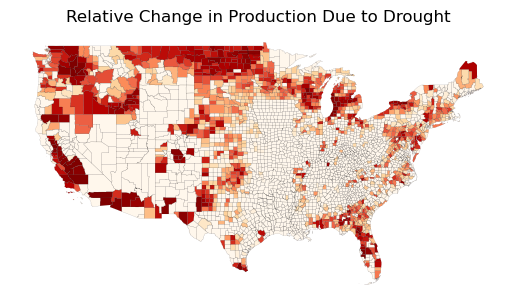

In [141]:
impact_static_map(production_climate_impacts_relative, "delta_kcal_produced_drought_Total", "OrRd", "./output-data/figures/relative-delta-produced-drought-total.png", "Relative Change in Production Due to Drought")

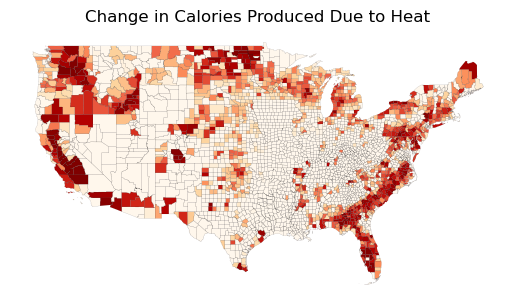

In [145]:
impact_static_map(production_climate_impacts, "delta_kcal_produced_heat_Total", "OrRd", "./output-data/figures/delta-calories-produced-heat-total.png", "Change in Calories Produced Due to Heat")

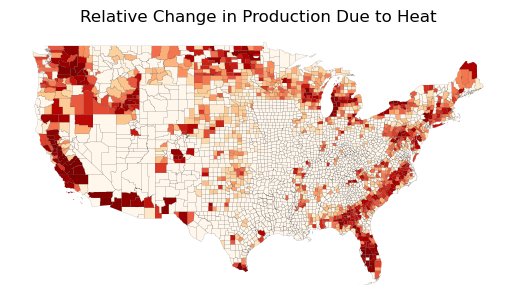

In [142]:
impact_static_map(production_climate_impacts_relative, "delta_kcal_produced_heat_Total", "OrRd", "./output-data/figures/relative-delta-produced-heat-total.png", "Relative Change in Production Due to Heat")

In [ ]:
impact_interactive_map(production_climate_impacts_relative, "delta_kcal_produced_heat_Total", "OrRd", "Relative Change in Production Due to Heat")

# Swarm Charts

In [151]:
for c in production_climate_impacts_relative.columns:
    print (c)

geoid
kcal_produced_heat_Corn
kcal_produced_heat_Rice
kcal_produced_heat_Peanuts
kcal_produced_heat_Sweet corn
kcal_produced_heat_Wheat
kcal_produced_heat_Oats
kcal_produced_heat_Potatoes
kcal_produced_heat_Onions
kcal_produced_heat_Cucumbers
kcal_produced_heat_Green peas
kcal_produced_heat_Tomatoes
kcal_produced_heat_Apples
kcal_produced_heat_Grapes
kcal_produced_heat_Other citrus fruits
kcal_produced_heat_Carrots
kcal_produced_heat_Oranges
kcal_produced_heat_Peppers
kcal_produced_heat_Lettuce
kcal_produced_heat_Cabbage
kcal_produced_heat_Celery
kcal_produced_heat_Radishes
kcal_produced_heat_Tree nuts
kcal_produced_heat_Other grain
kcal_produced_heat_Broccoli and cauliflower
kcal_produced_heat_Stone fruits
kcal_produced_heat_Berries
kcal_produced_heat_Legumes
kcal_produced_heat_Melons
kcal_produced_heat_Bananas
kcal_produced_heat_Tropical fruits
kcal_produced_Corn
kcal_produced_Rice
kcal_produced_Peanuts
kcal_produced_Sweet corn
kcal_produced_Wheat
kcal_produced_Oats
kcal_produced_Pot

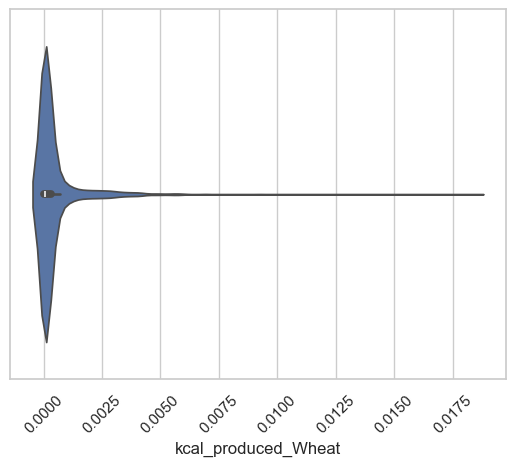

In [180]:
# Filter the DataFrame to include only non-null values in 'kcal_produced_Wheat'
# filtered_df = production_climate_impacts_relative.dropna(subset=['kcal_produced_Wheat'])

# Create the swarmplot
sns.set(style="whitegrid")  # Optional: Set the plot style

sns.violinplot(x="kcal_produced_Wheat", data=production_climate_impacts_relative)

# Optional: Rotate x-axis labels if they are long
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [190]:
food_cols

['kcal_produced_Corn',
 'kcal_produced_Rice',
 'kcal_produced_Peanuts',
 'kcal_produced_Sweet corn',
 'kcal_produced_Wheat',
 'kcal_produced_Oats',
 'kcal_produced_Potatoes',
 'kcal_produced_Onions',
 'kcal_produced_Cucumbers',
 'kcal_produced_Green peas',
 'kcal_produced_Tomatoes',
 'kcal_produced_Apples',
 'kcal_produced_Grapes',
 'kcal_produced_Other citrus fruits',
 'kcal_produced_Carrots',
 'kcal_produced_Oranges',
 'kcal_produced_Peppers',
 'kcal_produced_Lettuce',
 'kcal_produced_Cabbage',
 'kcal_produced_Celery',
 'kcal_produced_Radishes',
 'kcal_produced_Tree nuts',
 'kcal_produced_Other grain',
 'kcal_produced_Broccoli and cauliflower',
 'kcal_produced_Stone fruits',
 'kcal_produced_Berries',
 'kcal_produced_Legumes',
 'kcal_produced_Melons',
 'kcal_produced_Bananas',
 'kcal_produced_Tropical fruits']

In [ ]:
# (data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, fill=True, inner='box', split=False, width=0.8, dodge='auto', gap=0, linewidth=None, linecolor='auto', cut=2, gridsize=100, bw_method='scott', bw_adjust=1, density_norm='area', common_norm=False, hue_norm=None, formatter=None, log_scale=None, native_scale=False, legend='auto', scale=<deprecated>, scale_hue=<deprecated>, bw=<deprecated>, inner_kws=None, ax=None, **kwargs)

/var/folders/3v/8xxt4zw96bn2l6qwb8w7_5r40000gn/T/ipykernel_96027/1127549696.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




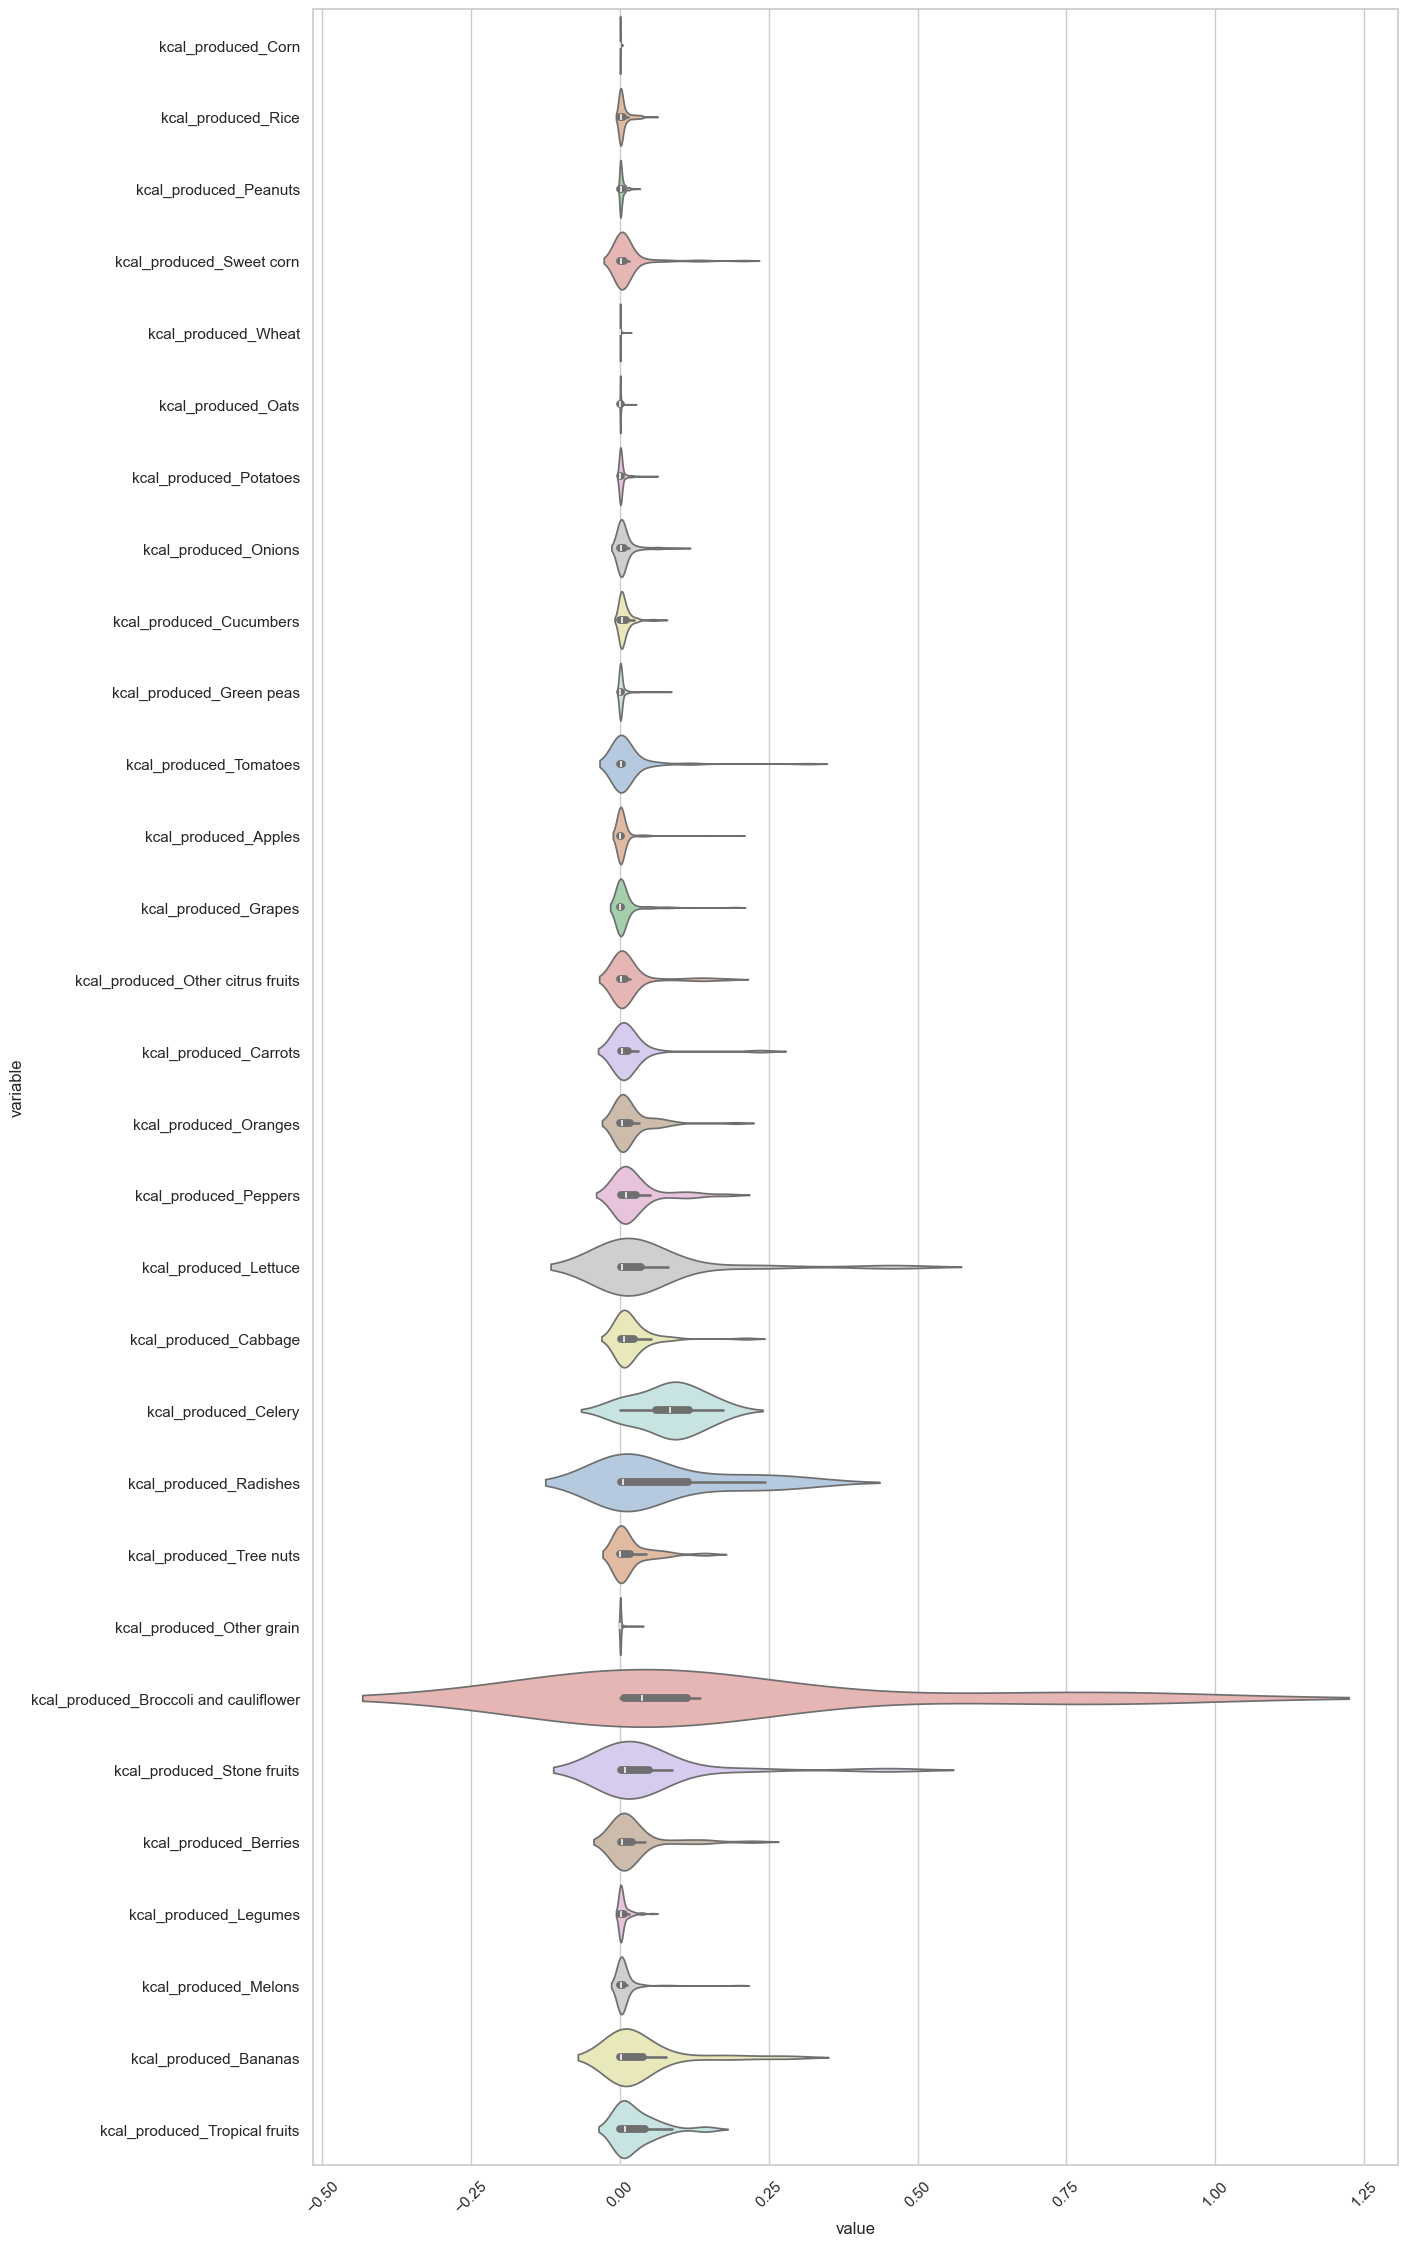

In [195]:
selected_data = production_climate_impacts_relative[food_cols]

# Reshape the data using pandas melt
melted_data = selected_data.melt()


# Create the violinplot
sns.set(style="whitegrid")  # Optional: Set the plot style
plt.figure(figsize=(14, 28))

sns.violinplot(x="value", y="variable", data=melted_data, palette="pastel" ,saturation=0.5)

# Optional: Rotate x-axis labels if they are long
plt.xticks(rotation=45)

# Show the plot
plt.show()

/var/folders/3v/8xxt4zw96bn2l6qwb8w7_5r40000gn/T/ipykernel_96027/1155646786.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




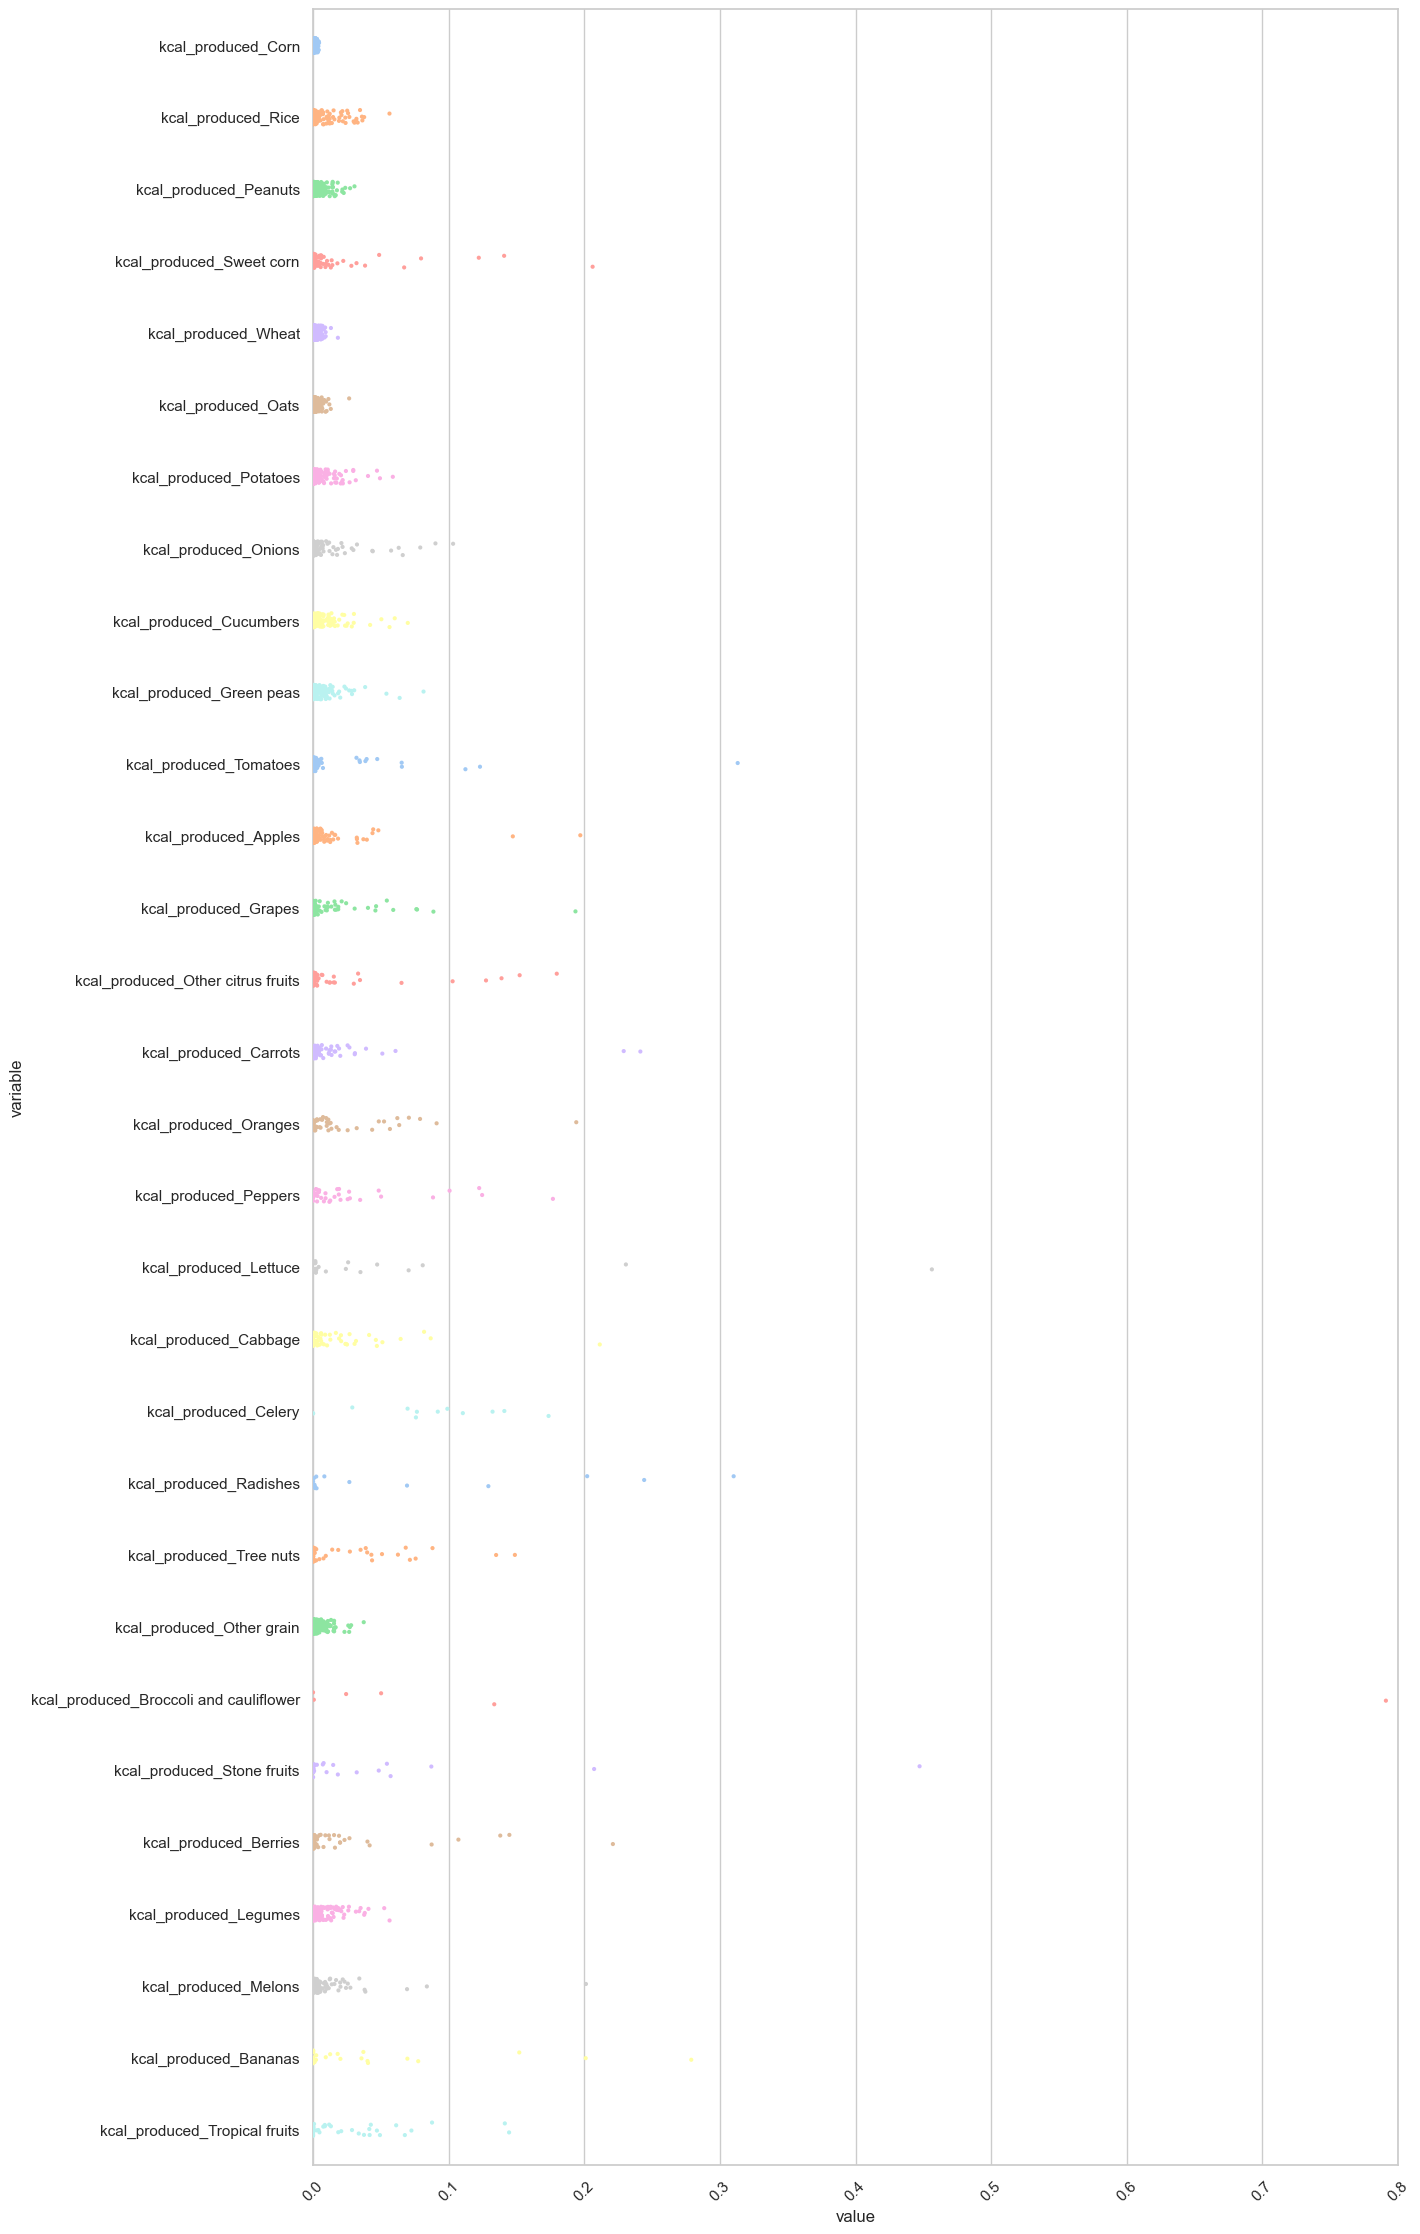

In [217]:
selected_data = production_climate_impacts_relative[food_cols]
melted_data = selected_data.melt()
plt.figure(figsize=(14, 28))
sns.stripplot(x="value", y="variable", data=melted_data, palette="pastel", size=3)
plt.xlim(0, 0.8)
plt.xticks(rotation=45)
plt.savefig("./output-data/figures/relative-produced-strip.png", bbox_inches='tight', dpi=600, )
plt.show()

/var/folders/3v/8xxt4zw96bn2l6qwb8w7_5r40000gn/T/ipykernel_96027/549459595.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




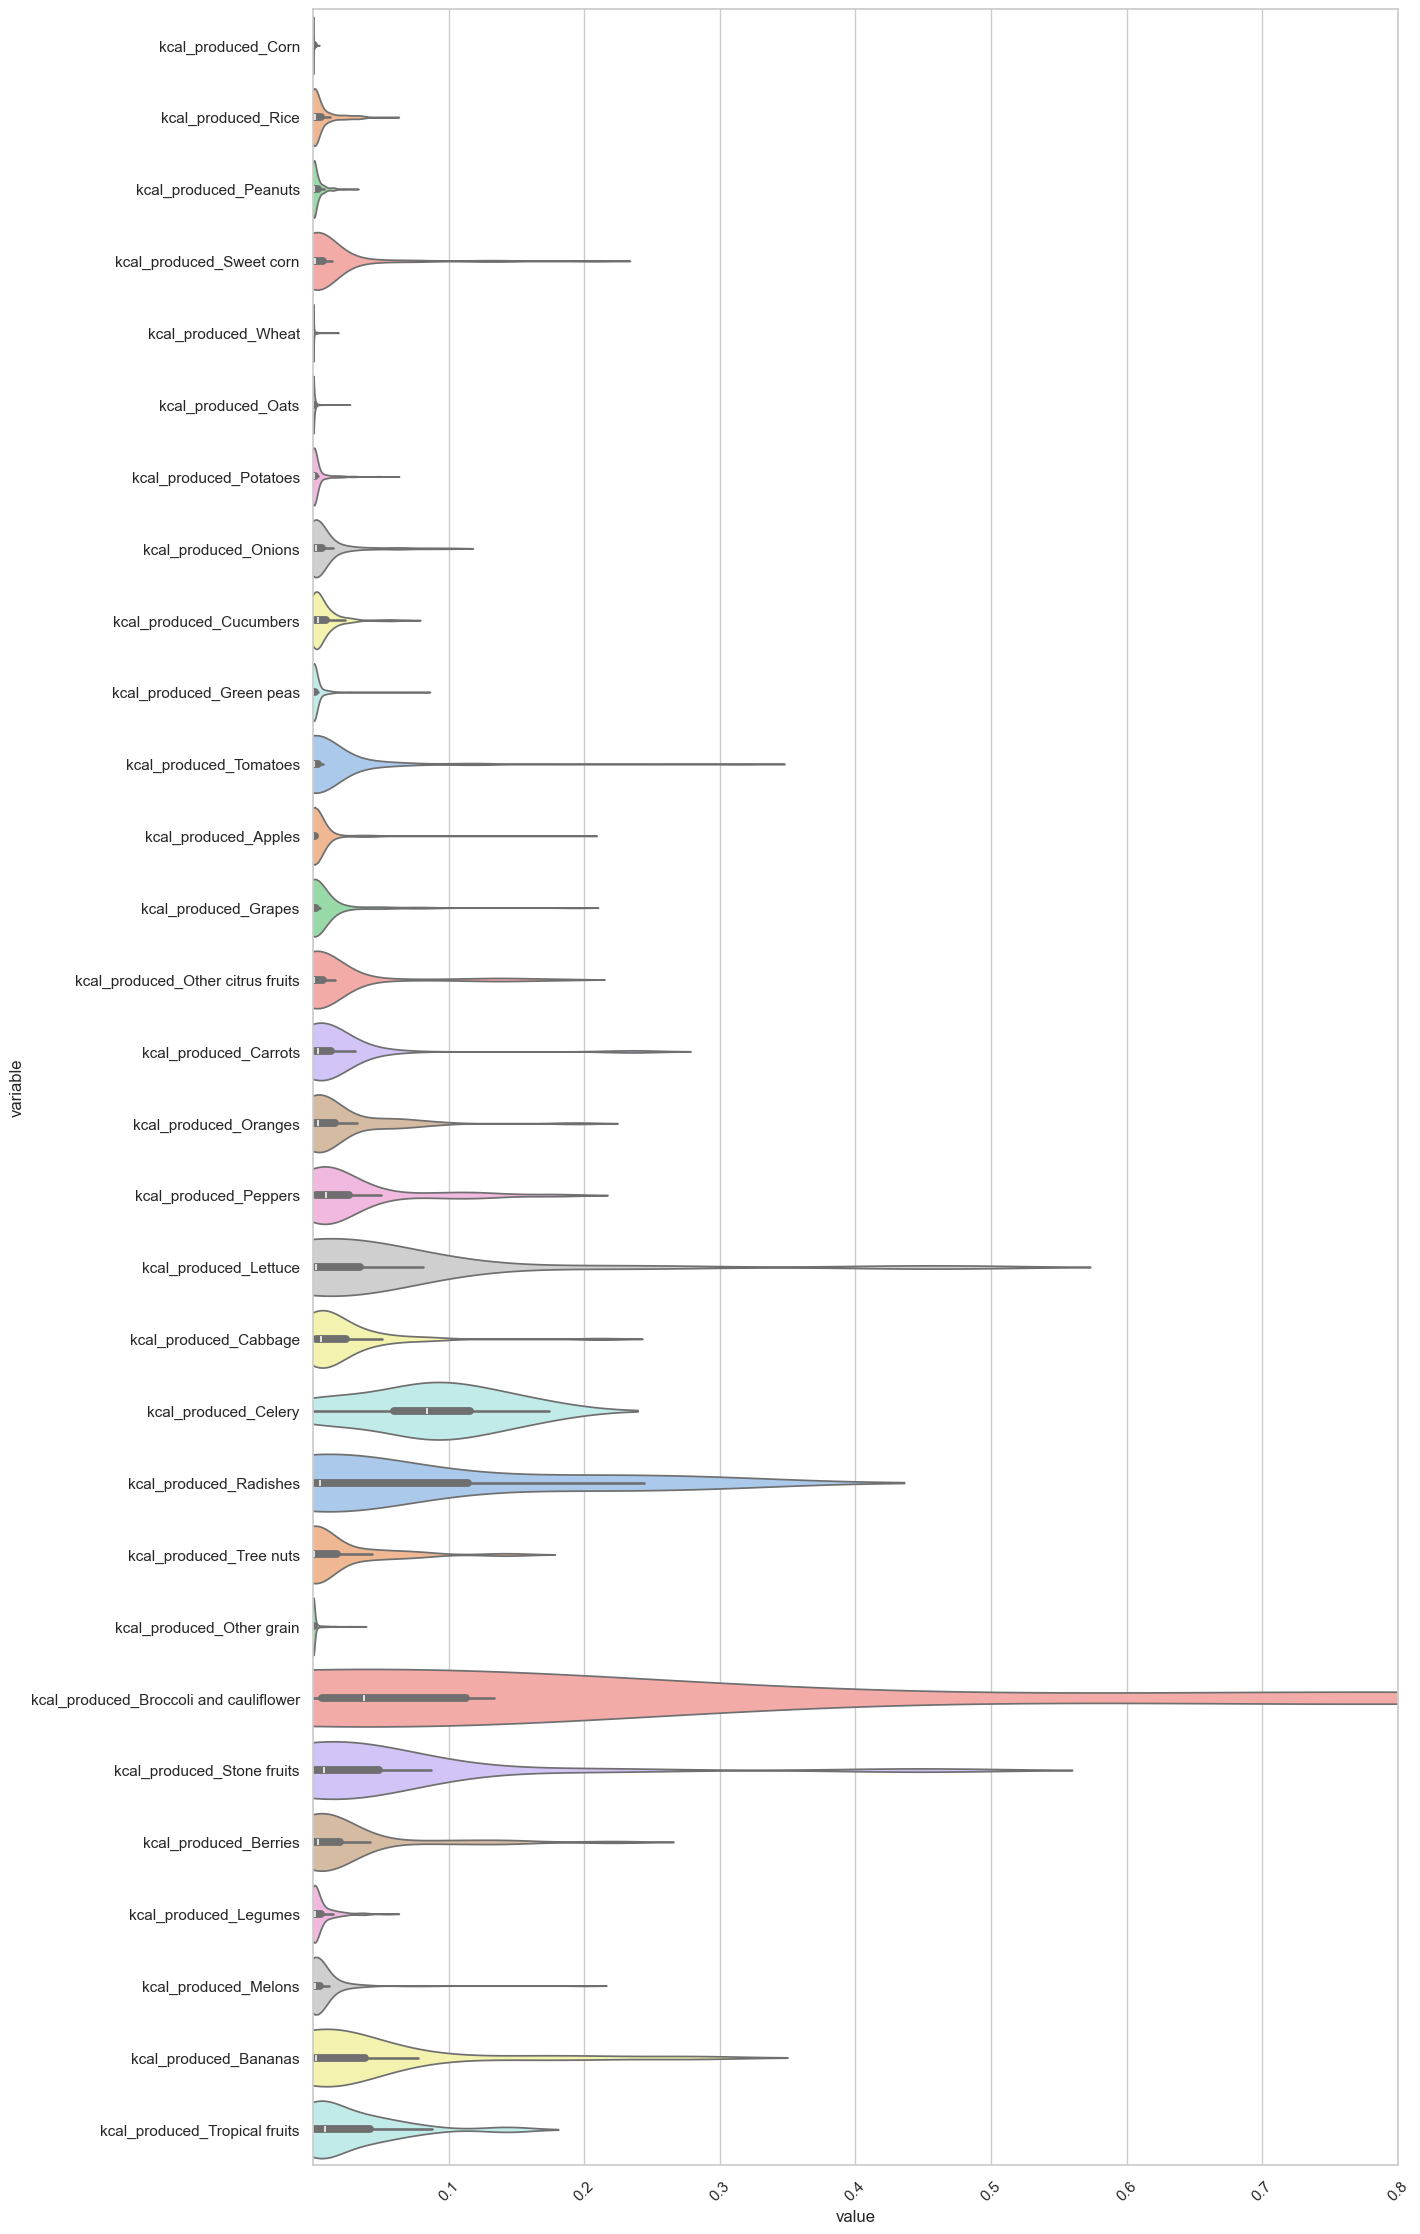

In [219]:
selected_data = production_climate_impacts_relative[food_cols]
melted_data = selected_data.melt()
plt.figure(figsize=(14, 28))
sns.violinplot(x="value", y="variable", data=melted_data, palette="pastel")
plt.xlim(0.00000001, 0.8)
plt.xticks(rotation=45)
# save to file at 600dpi
plt.savefig("./output-data/figures/relative-produced-violin.png", bbox_inches='tight', dpi=600, )
plt.show()

In [165]:
production_climate_impacts_relative["kcal_produced_Wheat"]

0       1.880411e-04
1       1.152033e-04
2       9.752638e-04
3                NaN
4       8.107765e-05
            ...     
3103             NaN
3104    9.585235e-07
3105             NaN
3106    4.143617e-07
3107    1.993180e-05
Name: kcal_produced_Wheat, Length: 3108, dtype: float64

In [164]:
filtered_df["kcal_produced_Wheat"]

0       1.880411e-04
1       1.152033e-04
2       9.752638e-04
4       8.107765e-05
5       2.013338e-05
            ...     
3100    1.272041e-04
3101    1.429548e-05
3104    9.585235e-07
3106    4.143617e-07
3107    1.993180e-05
Name: kcal_produced_Wheat, Length: 2214, dtype: float64

In [159]:
production_climate_impacts_relative

geoid  kcal_produced_heat_Corn  kcal_produced_heat_Rice  \
0      1001                      NaN                      NaN   
1      1003                      NaN                      NaN   
2      1005                      NaN                      NaN   
3      1007                      NaN                      NaN   
4      1009                      NaN                      NaN   
...     ...                      ...                      ...   
3103  56037                      NaN                      NaN   
3104  56039                      NaN                      NaN   
3105  56041                      NaN                      NaN   
3106  56043                      NaN                      NaN   
3107  56045                      NaN                      NaN   

      kcal_produced_heat_Peanuts  kcal_produced_heat_Sweet corn  \
0                       0.000139                            NaN   
1                       0.018003                            NaN   
2                       0.000884                            NaN   
3                            NaN                            NaN   
4                       0.000091                            NaN   
...                          ...                            ...   
3103                         NaN                            NaN   
3104                         NaN                            NaN   
3105                         NaN                            NaN   
3106                         NaN                            NaN   
3107                         NaN                            NaN   

      kcal_produced_heat_Wheat  kcal_produced_heat_Oats  \
0                          NaN                      NaN   
1                          NaN                      NaN   
2                          NaN                      NaN   
3                          NaN                      NaN   
4                          NaN                      NaN   
...                        ...                      ...   
3103                       NaN                      NaN   
3104                       NaN                      NaN   
3105                       NaN                      NaN   
3106                       NaN                      NaN   
3107                       NaN                      NaN   

      kcal_produced_heat_Potatoes  kcal_produced_heat_Onions  \
0                             NaN                        NaN   
1                        0.000406                        NaN   
2                             NaN                        NaN   
3                             NaN                        NaN   
4                             NaN                        NaN   
...                           ...                        ...   
3103                          NaN                        NaN   
3104                          NaN                        NaN   
3105                          NaN                        NaN   
3106                          NaN                        NaN   
3107                          NaN                        NaN   

      kcal_produced_heat_Cucumbers  kcal_produced_heat_Green peas  \
0                              NaN                            NaN   
1                              NaN                            NaN   
2                              NaN                            NaN   
3                              NaN                            NaN   
4                              NaN                            NaN   
...                            ...                            ...   
3103                           NaN                            NaN   
3104                           NaN                            NaN   
3105                           NaN                            NaN   
3106                           NaN                            NaN   
3107                           NaN                            NaN   

      kcal_produced_heat_Tomatoes  kcal_produced_heat_Apples  \
0                             NaN                